# Objectives

The objectives of the project are : 
* Data preprocessing
* Feature selection for model(s)
* Use useless features for clustering 
* Use useful features AND cluster for modeling.

# Dataset

This project uses a dataset from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/QSAR+biodegradation), which contains information about the relationships between chemical structure and biodegradation of molecules.

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression
#from statsmodels.api import OLS, add_constant
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
#from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans, AgglomerativeClustering

In [3]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [4]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_selection import RFECV

# Data preprocessing

In [5]:
df=pd.read_csv('data/biodeg.csv', header=None, sep=';')

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,RB


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1055 non-null   float64
 1   1       1055 non-null   float64
 2   2       1055 non-null   int64  
 3   3       1055 non-null   int64  
 4   4       1055 non-null   int64  
 5   5       1055 non-null   int64  
 6   6       1055 non-null   int64  
 7   7       1055 non-null   float64
 8   8       1055 non-null   int64  
 9   9       1055 non-null   int64  
 10  10      1055 non-null   int64  
 11  11      1055 non-null   float64
 12  12      1055 non-null   float64
 13  13      1055 non-null   float64
 14  14      1055 non-null   float64
 15  15      1055 non-null   int64  
 16  16      1055 non-null   float64
 17  17      1055 non-null   float64
 18  18      1055 non-null   int64  
 19  19      1055 non-null   int64  
 20  20      1055 non-null   int64  
 21  21      1055 non-null   float64
 22  

In [8]:
#add columns name
txt="""SpMax_L: Leading eigenvalue from Laplace matrix
J_Dz(e: Balaban-like index from Barysz matrix weighted by Sanderson electronegativity
nHM: Number of heavy atoms
F01[N-N]: Frequency of N-N at topological distance 1
F04[C-N]: Frequency of C-N at topological distance 4
NssssC: Number of atoms of type ssssC
nCb-: Number of substituted benzene C(sp2
C%: Percentage of C atoms
nCp: Number of terminal primary C(sp3
nO: Number of oxygen atoms
F03[C-N]: Frequency of C-N at topological distance 3
SdssC: Sum of dssC E-states
HyWi_B(m: Hyper-Wiener-like index (log function from Burden matrix weighted by mass
LOC: Lopping centric index
SM6_L: Spectral moment of order 6 from Laplace matrix
F03[C-O]: Frequency of C - O at topological distance 3
Me: Mean atomic Sanderson electronegativity (scaled on Carbon atom
Mi: Mean first ionization potential (scaled on Carbon atom
nN-N: Number of N hydrazines
nArNO2: Number of nitro groups (aromatic
nCRX3: Number of CRX3
SpPosA_B(p: Normalized spectral positive sum from Burden matrix weighted by polarizability
nCIR: Number of circuits
B01[C-Br]: Presence/absence of C - Br at topological distance 1
B03[C-Cl]: Presence/absence of C - Cl at topological distance 3
N-073: Ar2NH / Ar3N / Ar2N-Al / R..N..R
SpMax_A: Leading eigenvalue from adjacency matrix (Lovasz-Pelikan index
Psi_i_1d: Intrinsic state pseudoconnectivity index - type 1d
B04[C-Br]: Presence/absence of C - Br at topological distance 4
SdO: Sum of dO E-states
TI2_L: Second Mohar index from Laplace matrix
nCrt: Number of ring tertiary C(sp3
C-026: R--CX--R
F02[C-N]: Frequency of C - N at topological distance 2
nHDon: Number of donor atoms for H-bonds (N and O
SpMax_B(m: Leading eigenvalue from Burden matrix weighted by mass
Psi_i_A: Intrinsic state pseudoconnectivity index - type S average
nN: Number of Nitrogen atoms
SM6_B(m: Spectral moment of order 6 from Burden matrix weighted by mass
nArCOOR: Number of esters (aromatic
nX: Number of halogen atoms
experimental_class: ready biodegradable (RB and not ready biodegradable (NRB]"""

col=[i.split(":")[0].replace('[C-N]','_N') for i in str.splitlines(txt)]
col=[i.split("[")[0].replace('-','').rstrip('(mpe') for i in col]

df.columns=col

In [9]:
# target column is an object column, transform it into boolean column 
df.experimental_class.unique()

array(['RB', 'NRB'], dtype=object)

In [10]:
dic={'RB':1, 'NRB':0}
df.experimental_class=df.experimental_class.map(dic)

In [11]:
#check on columns, type, null values, and outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SpMax_L             1055 non-null   float64
 1   J_Dz                1055 non-null   float64
 2   nHM                 1055 non-null   int64  
 3   F01                 1055 non-null   int64  
 4   F04_N               1055 non-null   int64  
 5   NssssC              1055 non-null   int64  
 6   nCb                 1055 non-null   int64  
 7   C%                  1055 non-null   float64
 8   nC                  1055 non-null   int64  
 9   nO                  1055 non-null   int64  
 10  F03_N               1055 non-null   int64  
 11  SdssC               1055 non-null   float64
 12  HyWi_B              1055 non-null   float64
 13  LOC                 1055 non-null   float64
 14  SM6_L               1055 non-null   float64
 15  F03                 1055 non-null   int64  
 16  M     

In [12]:
df.isna().sum()

SpMax_L               0
J_Dz                  0
nHM                   0
F01                   0
F04_N                 0
NssssC                0
nCb                   0
C%                    0
nC                    0
nO                    0
F03_N                 0
SdssC                 0
HyWi_B                0
LOC                   0
SM6_L                 0
F03                   0
M                     0
Mi                    0
nNN                   0
nArNO2                0
nCRX3                 0
SpPosA_B              0
nCIR                  0
B01                   0
B03                   0
N073                  0
SpMax_A               0
Psi_i_1d              0
B04                   0
SdO                   0
TI2_L                 0
nCrt                  0
C026                  0
F02_N                 0
nHDon                 0
SpMax_B               0
Psi_i_A               0
nN                    0
SM6_B                 0
nArCOOR               0
nX                    0
experimental_cla

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SpMax_L,1055.0,4.782644,0.546916,2.0000,4.48100,4.8280,5.12500,6.4960
J_Dz,1055.0,3.069508,0.831308,0.8039,2.50275,3.0463,3.43765,9.1775
nHM,1055.0,0.716588,1.462452,0.0000,0.00000,0.0000,1.00000,12.0000
F01,1055.0,0.042654,0.256010,0.0000,0.00000,0.0000,0.00000,3.0000
F04_N,1055.0,0.980095,2.332955,0.0000,0.00000,0.0000,1.00000,36.0000
NssssC,1055.0,0.290047,1.073771,0.0000,0.00000,0.0000,0.00000,13.0000
nCb,1055.0,1.646445,2.224822,0.0000,0.00000,1.0000,3.00000,18.0000
C%,1055.0,37.055640,9.144466,0.0000,30.45000,37.5000,43.40000,60.7000
nC,1055.0,1.376303,1.963521,0.0000,0.00000,1.0000,2.00000,24.0000
nO,1055.0,1.803791,1.775435,0.0000,0.00000,2.0000,3.00000,12.0000


In [14]:
#check if it's imbalanced classification 
df.experimental_class.value_counts(normalize=True)

0    0.662559
1    0.337441
Name: experimental_class, dtype: float64

C:\Users\auror\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


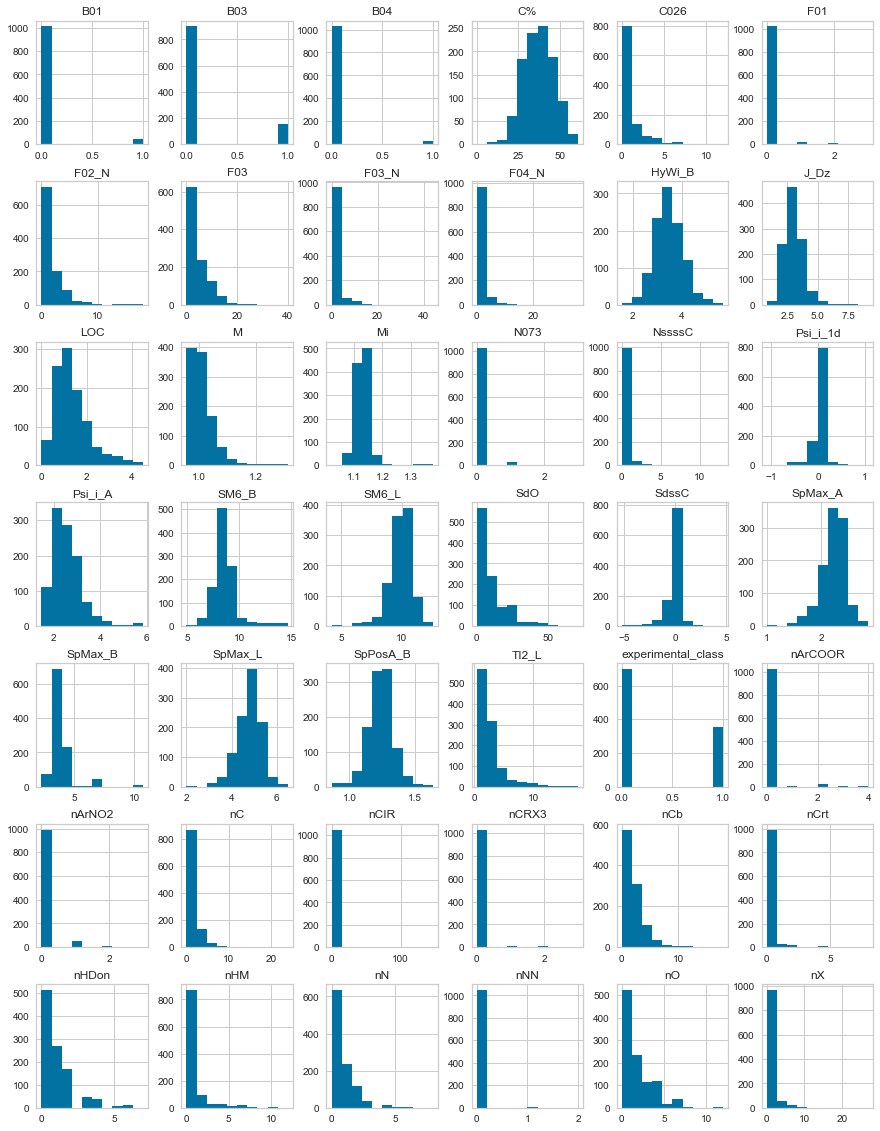

In [15]:
#check on the distribution
fig, ax = plt.subplots(figsize = (15,20))
df.hist(figsize = (15,20), ax = ax)
plt.show()

In [16]:
#check on the correlation

def corr_f(df, figsize=(6,6),i=0.7):
    plt.subplots(figsize=figsize)
    ax = sns.heatmap(
        df.corr(), 
        cmap='BrBG', annot=False)

    ax.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12);

    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=35,
        horizontalalignment='right', fontsize=10);

    ax.set_yticklabels(
        ax.get_xticklabels(), fontsize=10);

    corr_matrix = df.corr()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    col_hightly_correlated=[]

    for column in range(len(upper.columns)):
        for ind in range(len(upper.index)):
            if (upper.iloc[ind,column] > i) | (upper.iloc[ind,column] < -i):
                col_hightly_correlated.append([upper.index[ind], upper.index[column],round(upper.iloc[ind,column],2)])

    return col_hightly_correlated


[['F04_N', 'F03_N', 0.87],
 ['SpMax_L', 'SM6_L', 0.91],
 ['HyWi_B', 'SM6_L', 0.81],
 ['nO', 'F03', 0.84],
 ['Mi', 'SpPosA_B', -0.79],
 ['SpMax_L', 'SpMax_A', 0.92],
 ['SM6_L', 'SpMax_A', 0.92],
 ['B01', 'B04', 0.81],
 ['nO', 'SdO', 0.75],
 ['LOC', 'TI2_L', 0.75],
 ['nCb', 'C026', 0.8],
 ['F04_N', 'F02_N', 0.79],
 ['F03_N', 'F02_N', 0.8],
 ['M', 'Psi_i_A', 0.85],
 ['F04_N', 'nN', 0.75],
 ['F03_N', 'nN', 0.84],
 ['F02_N', 'nN', 0.8],
 ['HyWi_B', 'SM6_B', 0.82],
 ['SpMax_B', 'SM6_B', 0.92]]

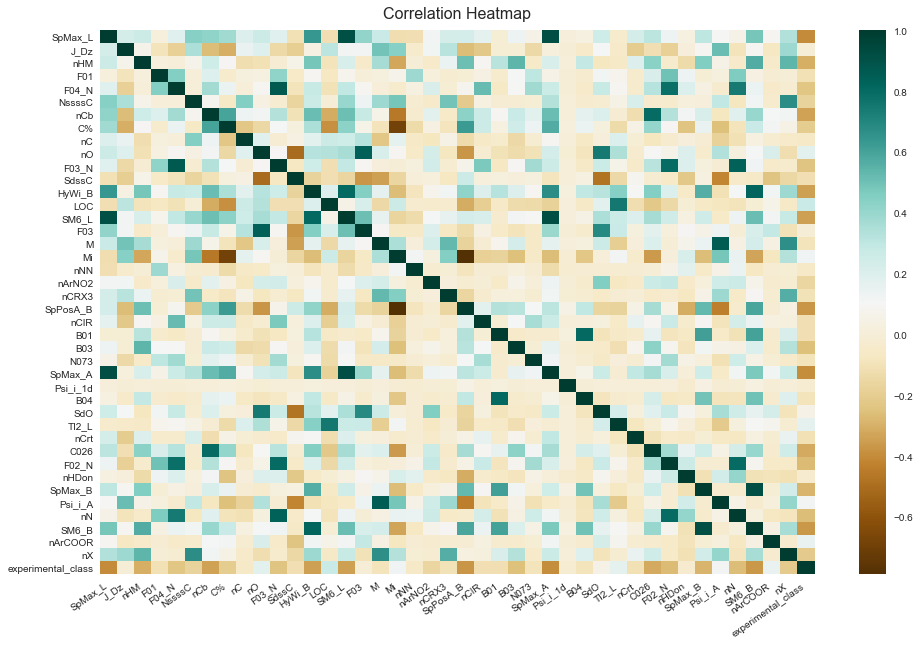

In [17]:
corr_f(df, (16,10), 0.7)

# Features Selection & cross validation

### Definition of a cross validation function

In [39]:
#list of models
knn3=KNeighborsClassifier(3)
knn5=KNeighborsClassifier(5)
sv=SVC()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
xgb=XGBClassifier()
ada=AdaBoostClassifier()
cat=CatBoostClassifier()

models=[knn3, knn5, sv, gnb, dtc, rfc, xgb, ada, cat]

In [19]:
#definition of a function which compute metrics for dataframe in input for all model in models
def f_cross(df, n_splits=5):
    
    X=df.drop('experimental_class',axis=1)
    y=df.experimental_class
    
    res_cross={}
    kfold=KFold(n_splits=n_splits, shuffle=True, random_state=42)


    for model in models:
        list_of_accuracies=[]
        list_of_precision=[]
        list_of_recall=[]
        list_of_f1=[]
        for train, test in kfold.split(X):
            model.fit(X.iloc[train], y.iloc[train])
            list_of_accuracies.append(accuracy_score(y.iloc[test], model.predict(X.iloc[test])))
            list_of_precision.append(precision_score(y.iloc[test], model.predict(X.iloc[test])))
            list_of_recall.append(recall_score(y.iloc[test], model.predict(X.iloc[test])))
            list_of_f1.append(f1_score(y.iloc[test], model.predict(X.iloc[test])))
        res_cross[str(model).split("(")[0].split('.')[0].replace('<','')]=[round(np.mean(list_of_precision),3),
                                                                           round(np.mean(list_of_accuracies),3), 
                                            round(np.mean(list_of_recall),3), round(np.mean(list_of_f1),3)]
        list_of_precision2=[round(i,3) for i in list_of_precision]
        print(model, ':', list_of_precision2)
    
    #The datafrane res_cross contains all the metrics value for all the models
    res_cross=pd.DataFrame(res_cross).T
    res_cross.columns=['precision', 'accuracy', 'recall', 'f1' ]
    res_cross.sort_values(by='precision', ascending=False, inplace=True)
    
    
    #display precision for each model
    x=np.arange(len(res_cross.index))
    plt.bar(x, res_cross.precision, color = (0,0.6,0.5,0.8), edgecolor='black')
    plt.xticks(x, res_cross.index, rotation=35,horizontalalignment='right', fontsize=12)
    plt.title('Precisions', fontsize=13)
    for i in range(len(res_cross.precision)):
        plt.text(x = i-0.3, y = res_cross.precision[i]+0.01, s = res_cross.precision[i])
    plt.show()
    
    return res_cross


### Cross validation of all the models without any feature selection

KNeighborsClassifier(n_neighbors=3) : [0.771, 0.686, 0.69, 0.757, 0.662]
KNeighborsClassifier() : [0.729, 0.653, 0.682, 0.771, 0.667]
SVC() : [0.807, 0.75, 0.734, 0.857, 0.727]
GaussianNB() : [0.627, 0.534, 0.538, 0.523, 0.5]
DecisionTreeClassifier() : [0.74, 0.681, 0.671, 0.75, 0.627]
RandomForestClassifier() : [0.873, 0.842, 0.812, 0.877, 0.8]
RandomForestClassifier(class_weight='balanced') : [0.831, 0.83, 0.836, 0.864, 0.833]
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, v

148:	learn: 0.3307954	total: 333ms	remaining: 1.9s
149:	learn: 0.3300118	total: 336ms	remaining: 1.9s
150:	learn: 0.3293212	total: 338ms	remaining: 1.9s
151:	learn: 0.3284787	total: 340ms	remaining: 1.9s
152:	learn: 0.3275683	total: 343ms	remaining: 1.9s
153:	learn: 0.3267116	total: 346ms	remaining: 1.9s
154:	learn: 0.3262943	total: 348ms	remaining: 1.9s
155:	learn: 0.3254006	total: 351ms	remaining: 1.9s
156:	learn: 0.3247773	total: 353ms	remaining: 1.9s
157:	learn: 0.3237380	total: 356ms	remaining: 1.89s
158:	learn: 0.3230277	total: 359ms	remaining: 1.9s
159:	learn: 0.3223351	total: 361ms	remaining: 1.9s
160:	learn: 0.3216954	total: 363ms	remaining: 1.89s
161:	learn: 0.3208523	total: 365ms	remaining: 1.89s
162:	learn: 0.3201172	total: 367ms	remaining: 1.89s
163:	learn: 0.3194187	total: 369ms	remaining: 1.88s
164:	learn: 0.3189902	total: 373ms	remaining: 1.89s
165:	learn: 0.3182159	total: 375ms	remaining: 1.88s
166:	learn: 0.3174292	total: 377ms	remaining: 1.88s
167:	learn: 0.3168087	t

371:	learn: 0.2334111	total: 837ms	remaining: 1.41s
372:	learn: 0.2331974	total: 840ms	remaining: 1.41s
373:	learn: 0.2329354	total: 843ms	remaining: 1.41s
374:	learn: 0.2327722	total: 845ms	remaining: 1.41s
375:	learn: 0.2326452	total: 847ms	remaining: 1.41s
376:	learn: 0.2324430	total: 850ms	remaining: 1.4s
377:	learn: 0.2321852	total: 852ms	remaining: 1.4s
378:	learn: 0.2318612	total: 855ms	remaining: 1.4s
379:	learn: 0.2317293	total: 858ms	remaining: 1.4s
380:	learn: 0.2315591	total: 860ms	remaining: 1.4s
381:	learn: 0.2313039	total: 862ms	remaining: 1.39s
382:	learn: 0.2310959	total: 864ms	remaining: 1.39s
383:	learn: 0.2309239	total: 866ms	remaining: 1.39s
384:	learn: 0.2306998	total: 868ms	remaining: 1.39s
385:	learn: 0.2304746	total: 871ms	remaining: 1.39s
386:	learn: 0.2301259	total: 873ms	remaining: 1.38s
387:	learn: 0.2299155	total: 875ms	remaining: 1.38s
388:	learn: 0.2296730	total: 877ms	remaining: 1.38s
389:	learn: 0.2294452	total: 880ms	remaining: 1.38s
390:	learn: 0.229

600:	learn: 0.1866574	total: 1.35s	remaining: 896ms
601:	learn: 0.1864488	total: 1.35s	remaining: 894ms
602:	learn: 0.1862529	total: 1.35s	remaining: 892ms
603:	learn: 0.1861493	total: 1.36s	remaining: 890ms
604:	learn: 0.1860342	total: 1.36s	remaining: 888ms
605:	learn: 0.1858759	total: 1.36s	remaining: 886ms
606:	learn: 0.1857585	total: 1.36s	remaining: 884ms
607:	learn: 0.1855817	total: 1.37s	remaining: 881ms
608:	learn: 0.1853799	total: 1.37s	remaining: 879ms
609:	learn: 0.1852438	total: 1.37s	remaining: 877ms
610:	learn: 0.1851273	total: 1.37s	remaining: 875ms
611:	learn: 0.1849202	total: 1.38s	remaining: 873ms
612:	learn: 0.1847208	total: 1.38s	remaining: 871ms
613:	learn: 0.1845087	total: 1.38s	remaining: 869ms
614:	learn: 0.1842866	total: 1.38s	remaining: 866ms
615:	learn: 0.1841430	total: 1.39s	remaining: 864ms
616:	learn: 0.1839287	total: 1.39s	remaining: 862ms
617:	learn: 0.1837968	total: 1.39s	remaining: 860ms
618:	learn: 0.1836672	total: 1.39s	remaining: 857ms
619:	learn: 

829:	learn: 0.1470069	total: 1.87s	remaining: 383ms
830:	learn: 0.1468095	total: 1.87s	remaining: 381ms
831:	learn: 0.1466040	total: 1.87s	remaining: 378ms
832:	learn: 0.1464030	total: 1.88s	remaining: 376ms
833:	learn: 0.1462563	total: 1.88s	remaining: 374ms
834:	learn: 0.1460550	total: 1.88s	remaining: 372ms
835:	learn: 0.1459100	total: 1.88s	remaining: 369ms
836:	learn: 0.1458351	total: 1.89s	remaining: 367ms
837:	learn: 0.1456378	total: 1.89s	remaining: 365ms
838:	learn: 0.1455204	total: 1.89s	remaining: 363ms
839:	learn: 0.1453597	total: 1.89s	remaining: 361ms
840:	learn: 0.1451286	total: 1.9s	remaining: 358ms
841:	learn: 0.1450005	total: 1.9s	remaining: 356ms
842:	learn: 0.1448026	total: 1.9s	remaining: 354ms
843:	learn: 0.1445968	total: 1.9s	remaining: 352ms
844:	learn: 0.1444928	total: 1.9s	remaining: 349ms
845:	learn: 0.1444091	total: 1.91s	remaining: 347ms
846:	learn: 0.1442621	total: 1.91s	remaining: 345ms
847:	learn: 0.1441507	total: 1.91s	remaining: 342ms
848:	learn: 0.144

8:	learn: 0.6393176	total: 51.6ms	remaining: 5.69s
9:	learn: 0.6346293	total: 55.3ms	remaining: 5.47s
10:	learn: 0.6287567	total: 59ms	remaining: 5.31s
11:	learn: 0.6232304	total: 61.9ms	remaining: 5.09s
12:	learn: 0.6167285	total: 65.5ms	remaining: 4.97s
13:	learn: 0.6111311	total: 68.5ms	remaining: 4.82s
14:	learn: 0.6059552	total: 71ms	remaining: 4.67s
15:	learn: 0.6012518	total: 73.2ms	remaining: 4.5s
16:	learn: 0.5963024	total: 75.3ms	remaining: 4.35s
17:	learn: 0.5906973	total: 77.6ms	remaining: 4.23s
18:	learn: 0.5857168	total: 80.3ms	remaining: 4.15s
19:	learn: 0.5806995	total: 82.4ms	remaining: 4.04s
20:	learn: 0.5768078	total: 84.4ms	remaining: 3.94s
21:	learn: 0.5726667	total: 86.4ms	remaining: 3.84s
22:	learn: 0.5681750	total: 88.6ms	remaining: 3.76s
23:	learn: 0.5631670	total: 90.6ms	remaining: 3.69s
24:	learn: 0.5596575	total: 93.3ms	remaining: 3.64s
25:	learn: 0.5547921	total: 95.4ms	remaining: 3.58s
26:	learn: 0.5502932	total: 97.5ms	remaining: 3.51s
27:	learn: 0.547154

237:	learn: 0.2697173	total: 561ms	remaining: 1.8s
238:	learn: 0.2692519	total: 564ms	remaining: 1.8s
239:	learn: 0.2688542	total: 567ms	remaining: 1.79s
240:	learn: 0.2684477	total: 570ms	remaining: 1.79s
241:	learn: 0.2679613	total: 572ms	remaining: 1.79s
242:	learn: 0.2676017	total: 574ms	remaining: 1.79s
243:	learn: 0.2670873	total: 576ms	remaining: 1.78s
244:	learn: 0.2665570	total: 579ms	remaining: 1.78s
245:	learn: 0.2661320	total: 581ms	remaining: 1.78s
246:	learn: 0.2658556	total: 583ms	remaining: 1.78s
247:	learn: 0.2653402	total: 586ms	remaining: 1.78s
248:	learn: 0.2649718	total: 588ms	remaining: 1.77s
249:	learn: 0.2645184	total: 590ms	remaining: 1.77s
250:	learn: 0.2640694	total: 592ms	remaining: 1.77s
251:	learn: 0.2637662	total: 595ms	remaining: 1.76s
252:	learn: 0.2632709	total: 597ms	remaining: 1.76s
253:	learn: 0.2627890	total: 599ms	remaining: 1.76s
254:	learn: 0.2624184	total: 601ms	remaining: 1.75s
255:	learn: 0.2619529	total: 603ms	remaining: 1.75s
256:	learn: 0.

451:	learn: 0.2056021	total: 1.07s	remaining: 1.3s
452:	learn: 0.2053413	total: 1.08s	remaining: 1.3s
453:	learn: 0.2051701	total: 1.08s	remaining: 1.3s
454:	learn: 0.2049147	total: 1.08s	remaining: 1.3s
455:	learn: 0.2047623	total: 1.08s	remaining: 1.29s
456:	learn: 0.2045976	total: 1.09s	remaining: 1.29s
457:	learn: 0.2042568	total: 1.09s	remaining: 1.29s
458:	learn: 0.2039809	total: 1.09s	remaining: 1.29s
459:	learn: 0.2037024	total: 1.09s	remaining: 1.28s
460:	learn: 0.2034465	total: 1.1s	remaining: 1.28s
461:	learn: 0.2031970	total: 1.1s	remaining: 1.28s
462:	learn: 0.2031601	total: 1.1s	remaining: 1.28s
463:	learn: 0.2029527	total: 1.1s	remaining: 1.28s
464:	learn: 0.2026543	total: 1.11s	remaining: 1.27s
465:	learn: 0.2024668	total: 1.11s	remaining: 1.27s
466:	learn: 0.2020101	total: 1.11s	remaining: 1.27s
467:	learn: 0.2016012	total: 1.11s	remaining: 1.27s
468:	learn: 0.2014514	total: 1.12s	remaining: 1.26s
469:	learn: 0.2013036	total: 1.12s	remaining: 1.26s
470:	learn: 0.201264

668:	learn: 0.1653763	total: 1.58s	remaining: 785ms
669:	learn: 0.1652708	total: 1.59s	remaining: 782ms
670:	learn: 0.1652190	total: 1.59s	remaining: 780ms
671:	learn: 0.1650399	total: 1.59s	remaining: 778ms
672:	learn: 0.1647849	total: 1.59s	remaining: 775ms
673:	learn: 0.1645956	total: 1.6s	remaining: 773ms
674:	learn: 0.1643286	total: 1.6s	remaining: 770ms
675:	learn: 0.1642845	total: 1.6s	remaining: 768ms
676:	learn: 0.1641268	total: 1.6s	remaining: 766ms
677:	learn: 0.1639508	total: 1.61s	remaining: 763ms
678:	learn: 0.1638988	total: 1.61s	remaining: 761ms
679:	learn: 0.1636018	total: 1.61s	remaining: 758ms
680:	learn: 0.1634635	total: 1.61s	remaining: 756ms
681:	learn: 0.1631433	total: 1.62s	remaining: 754ms
682:	learn: 0.1629338	total: 1.62s	remaining: 751ms
683:	learn: 0.1627872	total: 1.62s	remaining: 749ms
684:	learn: 0.1625940	total: 1.62s	remaining: 746ms
685:	learn: 0.1624027	total: 1.63s	remaining: 744ms
686:	learn: 0.1622199	total: 1.63s	remaining: 742ms
687:	learn: 0.16

895:	learn: 0.1315745	total: 2.09s	remaining: 243ms
896:	learn: 0.1315664	total: 2.09s	remaining: 240ms
897:	learn: 0.1315063	total: 2.1s	remaining: 238ms
898:	learn: 0.1313516	total: 2.1s	remaining: 236ms
899:	learn: 0.1311987	total: 2.1s	remaining: 233ms
900:	learn: 0.1311297	total: 2.1s	remaining: 231ms
901:	learn: 0.1309501	total: 2.1s	remaining: 229ms
902:	learn: 0.1308730	total: 2.11s	remaining: 226ms
903:	learn: 0.1307593	total: 2.11s	remaining: 224ms
904:	learn: 0.1305706	total: 2.11s	remaining: 222ms
905:	learn: 0.1304485	total: 2.12s	remaining: 219ms
906:	learn: 0.1304371	total: 2.12s	remaining: 217ms
907:	learn: 0.1302722	total: 2.12s	remaining: 215ms
908:	learn: 0.1300295	total: 2.12s	remaining: 213ms
909:	learn: 0.1299801	total: 2.13s	remaining: 210ms
910:	learn: 0.1299014	total: 2.13s	remaining: 208ms
911:	learn: 0.1297869	total: 2.13s	remaining: 206ms
912:	learn: 0.1295591	total: 2.13s	remaining: 203ms
913:	learn: 0.1295160	total: 2.13s	remaining: 201ms
914:	learn: 0.129

87:	learn: 0.3887678	total: 214ms	remaining: 2.22s
88:	learn: 0.3873363	total: 217ms	remaining: 2.22s
89:	learn: 0.3861549	total: 219ms	remaining: 2.22s
90:	learn: 0.3844249	total: 221ms	remaining: 2.21s
91:	learn: 0.3828656	total: 223ms	remaining: 2.21s
92:	learn: 0.3815456	total: 226ms	remaining: 2.21s
93:	learn: 0.3797704	total: 229ms	remaining: 2.21s
94:	learn: 0.3784596	total: 232ms	remaining: 2.21s
95:	learn: 0.3772913	total: 234ms	remaining: 2.21s
96:	learn: 0.3758036	total: 236ms	remaining: 2.2s
97:	learn: 0.3748047	total: 239ms	remaining: 2.2s
98:	learn: 0.3734271	total: 242ms	remaining: 2.2s
99:	learn: 0.3722592	total: 244ms	remaining: 2.2s
100:	learn: 0.3706832	total: 247ms	remaining: 2.19s
101:	learn: 0.3696464	total: 249ms	remaining: 2.19s
102:	learn: 0.3680976	total: 252ms	remaining: 2.19s
103:	learn: 0.3668486	total: 255ms	remaining: 2.19s
104:	learn: 0.3655959	total: 258ms	remaining: 2.2s
105:	learn: 0.3641715	total: 262ms	remaining: 2.21s
106:	learn: 0.3626054	total: 2

273:	learn: 0.2546619	total: 718ms	remaining: 1.9s
274:	learn: 0.2542286	total: 722ms	remaining: 1.9s
275:	learn: 0.2537185	total: 724ms	remaining: 1.9s
276:	learn: 0.2532945	total: 727ms	remaining: 1.9s
277:	learn: 0.2529698	total: 729ms	remaining: 1.89s
278:	learn: 0.2526467	total: 732ms	remaining: 1.89s
279:	learn: 0.2522794	total: 735ms	remaining: 1.89s
280:	learn: 0.2519432	total: 738ms	remaining: 1.89s
281:	learn: 0.2513556	total: 740ms	remaining: 1.88s
282:	learn: 0.2506535	total: 743ms	remaining: 1.88s
283:	learn: 0.2501548	total: 745ms	remaining: 1.88s
284:	learn: 0.2497787	total: 748ms	remaining: 1.88s
285:	learn: 0.2494681	total: 751ms	remaining: 1.88s
286:	learn: 0.2490028	total: 754ms	remaining: 1.87s
287:	learn: 0.2487761	total: 756ms	remaining: 1.87s
288:	learn: 0.2485680	total: 758ms	remaining: 1.86s
289:	learn: 0.2481445	total: 761ms	remaining: 1.86s
290:	learn: 0.2478837	total: 764ms	remaining: 1.86s
291:	learn: 0.2475464	total: 767ms	remaining: 1.86s
292:	learn: 0.24

453:	learn: 0.2030364	total: 1.22s	remaining: 1.46s
454:	learn: 0.2027537	total: 1.22s	remaining: 1.46s
455:	learn: 0.2023909	total: 1.22s	remaining: 1.46s
456:	learn: 0.2022052	total: 1.22s	remaining: 1.45s
457:	learn: 0.2020957	total: 1.23s	remaining: 1.45s
458:	learn: 0.2019118	total: 1.23s	remaining: 1.45s
459:	learn: 0.2017264	total: 1.23s	remaining: 1.45s
460:	learn: 0.2013665	total: 1.24s	remaining: 1.44s
461:	learn: 0.2011918	total: 1.24s	remaining: 1.44s
462:	learn: 0.2011370	total: 1.24s	remaining: 1.44s
463:	learn: 0.2009040	total: 1.24s	remaining: 1.44s
464:	learn: 0.2006009	total: 1.25s	remaining: 1.43s
465:	learn: 0.2004220	total: 1.25s	remaining: 1.43s
466:	learn: 0.2002943	total: 1.25s	remaining: 1.43s
467:	learn: 0.2001538	total: 1.25s	remaining: 1.43s
468:	learn: 0.1998579	total: 1.26s	remaining: 1.42s
469:	learn: 0.1995966	total: 1.26s	remaining: 1.42s
470:	learn: 0.1994551	total: 1.26s	remaining: 1.42s
471:	learn: 0.1992314	total: 1.26s	remaining: 1.42s
472:	learn: 

634:	learn: 0.1672977	total: 1.72s	remaining: 987ms
635:	learn: 0.1670962	total: 1.72s	remaining: 984ms
636:	learn: 0.1670018	total: 1.72s	remaining: 982ms
637:	learn: 0.1668314	total: 1.73s	remaining: 979ms
638:	learn: 0.1666788	total: 1.73s	remaining: 977ms
639:	learn: 0.1665315	total: 1.73s	remaining: 974ms
640:	learn: 0.1663443	total: 1.73s	remaining: 971ms
641:	learn: 0.1661460	total: 1.74s	remaining: 969ms
642:	learn: 0.1660592	total: 1.74s	remaining: 967ms
643:	learn: 0.1658547	total: 1.74s	remaining: 964ms
644:	learn: 0.1657627	total: 1.75s	remaining: 961ms
645:	learn: 0.1654893	total: 1.75s	remaining: 958ms
646:	learn: 0.1652093	total: 1.75s	remaining: 956ms
647:	learn: 0.1649124	total: 1.75s	remaining: 953ms
648:	learn: 0.1647863	total: 1.76s	remaining: 950ms
649:	learn: 0.1645414	total: 1.76s	remaining: 947ms
650:	learn: 0.1643072	total: 1.76s	remaining: 944ms
651:	learn: 0.1640201	total: 1.76s	remaining: 942ms
652:	learn: 0.1637761	total: 1.77s	remaining: 940ms
653:	learn: 

824:	learn: 0.1349072	total: 2.23s	remaining: 473ms
825:	learn: 0.1347059	total: 2.23s	remaining: 471ms
826:	learn: 0.1345967	total: 2.24s	remaining: 468ms
827:	learn: 0.1344852	total: 2.24s	remaining: 465ms
828:	learn: 0.1343740	total: 2.24s	remaining: 463ms
829:	learn: 0.1342568	total: 2.25s	remaining: 460ms
830:	learn: 0.1341567	total: 2.25s	remaining: 457ms
831:	learn: 0.1340306	total: 2.25s	remaining: 455ms
832:	learn: 0.1338643	total: 2.25s	remaining: 452ms
833:	learn: 0.1336054	total: 2.26s	remaining: 449ms
834:	learn: 0.1335454	total: 2.26s	remaining: 446ms
835:	learn: 0.1334438	total: 2.26s	remaining: 444ms
836:	learn: 0.1332405	total: 2.26s	remaining: 441ms
837:	learn: 0.1330858	total: 2.27s	remaining: 438ms
838:	learn: 0.1329589	total: 2.27s	remaining: 435ms
839:	learn: 0.1328828	total: 2.27s	remaining: 432ms
840:	learn: 0.1328057	total: 2.27s	remaining: 430ms
841:	learn: 0.1326340	total: 2.28s	remaining: 427ms
842:	learn: 0.1324717	total: 2.28s	remaining: 424ms
843:	learn: 

0:	learn: 0.6857470	total: 8.58ms	remaining: 8.57s
1:	learn: 0.6791394	total: 12.3ms	remaining: 6.14s
2:	learn: 0.6723302	total: 16.2ms	remaining: 5.39s
3:	learn: 0.6671282	total: 20.5ms	remaining: 5.1s
4:	learn: 0.6610604	total: 24ms	remaining: 4.78s
5:	learn: 0.6549465	total: 26.7ms	remaining: 4.42s
6:	learn: 0.6487141	total: 29.7ms	remaining: 4.21s
7:	learn: 0.6428003	total: 33ms	remaining: 4.09s
8:	learn: 0.6370933	total: 35.5ms	remaining: 3.91s
9:	learn: 0.6317709	total: 37.7ms	remaining: 3.73s
10:	learn: 0.6260610	total: 39.8ms	remaining: 3.58s
11:	learn: 0.6212102	total: 41.9ms	remaining: 3.45s
12:	learn: 0.6160868	total: 44.6ms	remaining: 3.38s
13:	learn: 0.6101642	total: 48.2ms	remaining: 3.39s
14:	learn: 0.6053038	total: 51.1ms	remaining: 3.35s
15:	learn: 0.6011973	total: 53.2ms	remaining: 3.27s
16:	learn: 0.5959903	total: 55.3ms	remaining: 3.2s
17:	learn: 0.5912357	total: 57.5ms	remaining: 3.13s
18:	learn: 0.5877109	total: 59.6ms	remaining: 3.08s
19:	learn: 0.5838391	total: 

190:	learn: 0.2987999	total: 515ms	remaining: 2.18s
191:	learn: 0.2982693	total: 517ms	remaining: 2.18s
192:	learn: 0.2975952	total: 519ms	remaining: 2.17s
193:	learn: 0.2969338	total: 521ms	remaining: 2.17s
194:	learn: 0.2963285	total: 524ms	remaining: 2.16s
195:	learn: 0.2957893	total: 527ms	remaining: 2.16s
196:	learn: 0.2949237	total: 531ms	remaining: 2.16s
197:	learn: 0.2943165	total: 533ms	remaining: 2.16s
198:	learn: 0.2937715	total: 535ms	remaining: 2.15s
199:	learn: 0.2932676	total: 537ms	remaining: 2.15s
200:	learn: 0.2926920	total: 541ms	remaining: 2.15s
201:	learn: 0.2921686	total: 544ms	remaining: 2.15s
202:	learn: 0.2913879	total: 546ms	remaining: 2.14s
203:	learn: 0.2907341	total: 548ms	remaining: 2.14s
204:	learn: 0.2900154	total: 550ms	remaining: 2.13s
205:	learn: 0.2892632	total: 552ms	remaining: 2.13s
206:	learn: 0.2888974	total: 556ms	remaining: 2.13s
207:	learn: 0.2883395	total: 559ms	remaining: 2.13s
208:	learn: 0.2880246	total: 561ms	remaining: 2.12s
209:	learn: 

388:	learn: 0.2242469	total: 1.02s	remaining: 1.61s
389:	learn: 0.2240102	total: 1.02s	remaining: 1.6s
390:	learn: 0.2237627	total: 1.03s	remaining: 1.6s
391:	learn: 0.2234461	total: 1.03s	remaining: 1.6s
392:	learn: 0.2233269	total: 1.03s	remaining: 1.59s
393:	learn: 0.2230453	total: 1.03s	remaining: 1.59s
394:	learn: 0.2226491	total: 1.04s	remaining: 1.59s
395:	learn: 0.2224479	total: 1.04s	remaining: 1.59s
396:	learn: 0.2222009	total: 1.04s	remaining: 1.58s
397:	learn: 0.2219736	total: 1.04s	remaining: 1.58s
398:	learn: 0.2216203	total: 1.05s	remaining: 1.58s
399:	learn: 0.2214719	total: 1.05s	remaining: 1.58s
400:	learn: 0.2212736	total: 1.05s	remaining: 1.57s
401:	learn: 0.2209953	total: 1.05s	remaining: 1.57s
402:	learn: 0.2207706	total: 1.06s	remaining: 1.57s
403:	learn: 0.2206068	total: 1.06s	remaining: 1.56s
404:	learn: 0.2203866	total: 1.06s	remaining: 1.56s
405:	learn: 0.2199567	total: 1.07s	remaining: 1.56s
406:	learn: 0.2196398	total: 1.07s	remaining: 1.56s
407:	learn: 0.2

582:	learn: 0.1810911	total: 1.51s	remaining: 1.08s
583:	learn: 0.1809050	total: 1.52s	remaining: 1.08s
584:	learn: 0.1808249	total: 1.52s	remaining: 1.08s
585:	learn: 0.1807267	total: 1.52s	remaining: 1.07s
586:	learn: 0.1805049	total: 1.52s	remaining: 1.07s
587:	learn: 0.1803400	total: 1.53s	remaining: 1.07s
588:	learn: 0.1802086	total: 1.53s	remaining: 1.07s
589:	learn: 0.1800473	total: 1.53s	remaining: 1.06s
590:	learn: 0.1798656	total: 1.53s	remaining: 1.06s
591:	learn: 0.1796488	total: 1.54s	remaining: 1.06s
592:	learn: 0.1795638	total: 1.54s	remaining: 1.06s
593:	learn: 0.1794489	total: 1.54s	remaining: 1.05s
594:	learn: 0.1792967	total: 1.54s	remaining: 1.05s
595:	learn: 0.1791709	total: 1.55s	remaining: 1.05s
596:	learn: 0.1789185	total: 1.55s	remaining: 1.05s
597:	learn: 0.1787363	total: 1.55s	remaining: 1.04s
598:	learn: 0.1784633	total: 1.55s	remaining: 1.04s
599:	learn: 0.1782652	total: 1.56s	remaining: 1.04s
600:	learn: 0.1779548	total: 1.56s	remaining: 1.03s
601:	learn: 

778:	learn: 0.1469504	total: 2.02s	remaining: 574ms
779:	learn: 0.1467445	total: 2.02s	remaining: 571ms
780:	learn: 0.1465514	total: 2.03s	remaining: 569ms
781:	learn: 0.1464611	total: 2.03s	remaining: 566ms
782:	learn: 0.1464407	total: 2.03s	remaining: 563ms
783:	learn: 0.1463010	total: 2.03s	remaining: 560ms
784:	learn: 0.1462280	total: 2.04s	remaining: 558ms
785:	learn: 0.1459963	total: 2.04s	remaining: 555ms
786:	learn: 0.1457937	total: 2.04s	remaining: 553ms
787:	learn: 0.1455787	total: 2.04s	remaining: 550ms
788:	learn: 0.1452740	total: 2.04s	remaining: 547ms
789:	learn: 0.1451626	total: 2.05s	remaining: 544ms
790:	learn: 0.1449738	total: 2.05s	remaining: 542ms
791:	learn: 0.1448477	total: 2.05s	remaining: 539ms
792:	learn: 0.1446826	total: 2.06s	remaining: 537ms
793:	learn: 0.1445367	total: 2.06s	remaining: 534ms
794:	learn: 0.1443808	total: 2.06s	remaining: 531ms
795:	learn: 0.1443536	total: 2.06s	remaining: 528ms
796:	learn: 0.1441631	total: 2.06s	remaining: 526ms
797:	learn: 

Learning rate set to 0.009583
0:	learn: 0.6865546	total: 7.81ms	remaining: 7.8s
1:	learn: 0.6797415	total: 13.2ms	remaining: 6.61s
2:	learn: 0.6727172	total: 18.5ms	remaining: 6.14s
3:	learn: 0.6670029	total: 23.4ms	remaining: 5.82s
4:	learn: 0.6612224	total: 27.6ms	remaining: 5.49s
5:	learn: 0.6539998	total: 31.7ms	remaining: 5.24s
6:	learn: 0.6491514	total: 35.7ms	remaining: 5.07s
7:	learn: 0.6420575	total: 39ms	remaining: 4.83s
8:	learn: 0.6356222	total: 42.5ms	remaining: 4.68s
9:	learn: 0.6308012	total: 45.2ms	remaining: 4.48s
10:	learn: 0.6250750	total: 48.2ms	remaining: 4.33s
11:	learn: 0.6188438	total: 50.6ms	remaining: 4.16s
12:	learn: 0.6137725	total: 52.9ms	remaining: 4.01s
13:	learn: 0.6076467	total: 55.2ms	remaining: 3.89s
14:	learn: 0.6024416	total: 57.2ms	remaining: 3.76s
15:	learn: 0.5965180	total: 59.3ms	remaining: 3.65s
16:	learn: 0.5913805	total: 61.5ms	remaining: 3.56s
17:	learn: 0.5862203	total: 64ms	remaining: 3.49s
18:	learn: 0.5811386	total: 66.3ms	remaining: 3.4

218:	learn: 0.2696638	total: 505ms	remaining: 1.8s
219:	learn: 0.2691405	total: 507ms	remaining: 1.8s
220:	learn: 0.2687957	total: 510ms	remaining: 1.8s
221:	learn: 0.2682123	total: 512ms	remaining: 1.79s
222:	learn: 0.2676356	total: 514ms	remaining: 1.79s
223:	learn: 0.2672628	total: 516ms	remaining: 1.79s
224:	learn: 0.2668921	total: 519ms	remaining: 1.79s
225:	learn: 0.2664649	total: 522ms	remaining: 1.79s
226:	learn: 0.2659169	total: 524ms	remaining: 1.78s
227:	learn: 0.2654150	total: 526ms	remaining: 1.78s
228:	learn: 0.2650551	total: 528ms	remaining: 1.78s
229:	learn: 0.2645979	total: 531ms	remaining: 1.78s
230:	learn: 0.2636533	total: 533ms	remaining: 1.77s
231:	learn: 0.2631701	total: 535ms	remaining: 1.77s
232:	learn: 0.2626670	total: 537ms	remaining: 1.77s
233:	learn: 0.2620985	total: 539ms	remaining: 1.77s
234:	learn: 0.2615258	total: 542ms	remaining: 1.76s
235:	learn: 0.2610824	total: 544ms	remaining: 1.76s
236:	learn: 0.2608665	total: 546ms	remaining: 1.76s
237:	learn: 0.2

376:	learn: 0.2153100	total: 854ms	remaining: 1.41s
377:	learn: 0.2151390	total: 856ms	remaining: 1.41s
378:	learn: 0.2149046	total: 858ms	remaining: 1.41s
379:	learn: 0.2147268	total: 861ms	remaining: 1.4s
380:	learn: 0.2144875	total: 863ms	remaining: 1.4s
381:	learn: 0.2143213	total: 866ms	remaining: 1.4s
382:	learn: 0.2140429	total: 868ms	remaining: 1.4s
383:	learn: 0.2138079	total: 870ms	remaining: 1.4s
384:	learn: 0.2134856	total: 872ms	remaining: 1.39s
385:	learn: 0.2133064	total: 874ms	remaining: 1.39s
386:	learn: 0.2129983	total: 877ms	remaining: 1.39s
387:	learn: 0.2126906	total: 880ms	remaining: 1.39s
388:	learn: 0.2124456	total: 883ms	remaining: 1.39s
389:	learn: 0.2121601	total: 885ms	remaining: 1.38s
390:	learn: 0.2119535	total: 887ms	remaining: 1.38s
391:	learn: 0.2118334	total: 889ms	remaining: 1.38s
392:	learn: 0.2116923	total: 892ms	remaining: 1.38s
393:	learn: 0.2114832	total: 894ms	remaining: 1.37s
394:	learn: 0.2112636	total: 896ms	remaining: 1.37s
395:	learn: 0.210

600:	learn: 0.1680628	total: 1.35s	remaining: 897ms
601:	learn: 0.1678596	total: 1.35s	remaining: 895ms
602:	learn: 0.1676735	total: 1.35s	remaining: 892ms
603:	learn: 0.1674924	total: 1.36s	remaining: 890ms
604:	learn: 0.1672886	total: 1.36s	remaining: 889ms
605:	learn: 0.1671914	total: 1.36s	remaining: 887ms
606:	learn: 0.1668666	total: 1.37s	remaining: 885ms
607:	learn: 0.1666541	total: 1.37s	remaining: 882ms
608:	learn: 0.1664859	total: 1.37s	remaining: 880ms
609:	learn: 0.1663165	total: 1.37s	remaining: 878ms
610:	learn: 0.1661781	total: 1.38s	remaining: 876ms
611:	learn: 0.1660669	total: 1.38s	remaining: 874ms
612:	learn: 0.1657567	total: 1.38s	remaining: 871ms
613:	learn: 0.1656014	total: 1.38s	remaining: 869ms
614:	learn: 0.1653360	total: 1.38s	remaining: 867ms
615:	learn: 0.1652433	total: 1.39s	remaining: 864ms
616:	learn: 0.1650663	total: 1.39s	remaining: 862ms
617:	learn: 0.1649746	total: 1.39s	remaining: 860ms
618:	learn: 0.1647997	total: 1.39s	remaining: 858ms
619:	learn: 

827:	learn: 0.1290180	total: 1.86s	remaining: 386ms
828:	learn: 0.1289281	total: 1.86s	remaining: 384ms
829:	learn: 0.1287954	total: 1.86s	remaining: 382ms
830:	learn: 0.1285966	total: 1.87s	remaining: 380ms
831:	learn: 0.1283997	total: 1.87s	remaining: 377ms
832:	learn: 0.1282094	total: 1.87s	remaining: 375ms
833:	learn: 0.1280945	total: 1.87s	remaining: 373ms
834:	learn: 0.1279016	total: 1.88s	remaining: 371ms
835:	learn: 0.1276420	total: 1.88s	remaining: 368ms
836:	learn: 0.1275253	total: 1.88s	remaining: 366ms
837:	learn: 0.1273397	total: 1.88s	remaining: 364ms
838:	learn: 0.1271712	total: 1.89s	remaining: 362ms
839:	learn: 0.1269994	total: 1.89s	remaining: 359ms
840:	learn: 0.1267976	total: 1.89s	remaining: 357ms
841:	learn: 0.1265391	total: 1.89s	remaining: 355ms
842:	learn: 0.1263518	total: 1.89s	remaining: 353ms
843:	learn: 0.1261262	total: 1.9s	remaining: 350ms
844:	learn: 0.1260072	total: 1.9s	remaining: 348ms
845:	learn: 0.1258938	total: 1.9s	remaining: 346ms
846:	learn: 0.1

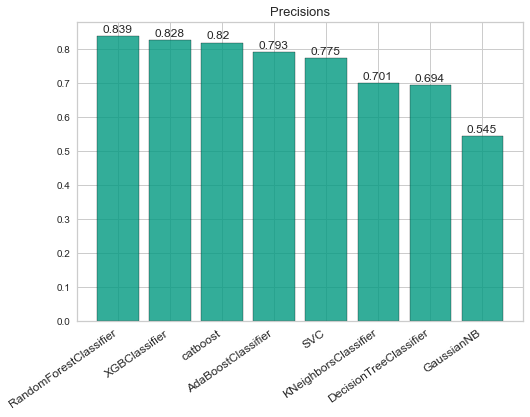

,precision,accuracy,recall,f1
RandomForestClassifier,0.839,0.863,0.731,0.780
XGBClassifier,0.828,0.865,0.753,0.788
catboost,0.820,0.864,0.759,0.788
AdaBoostClassifier,0.793,0.856,0.774,0.782
SVC,0.775,0.807,0.599,0.675
KNeighborsClassifier,0.701,0.808,0.748,0.722
DecisionTreeClassifier,0.694,0.797,0.712,0.702
GaussianNB,0.545,0.714,0.937,0.688


In [18]:
f_cross(df)

### Cross validation with features selection : Lasso

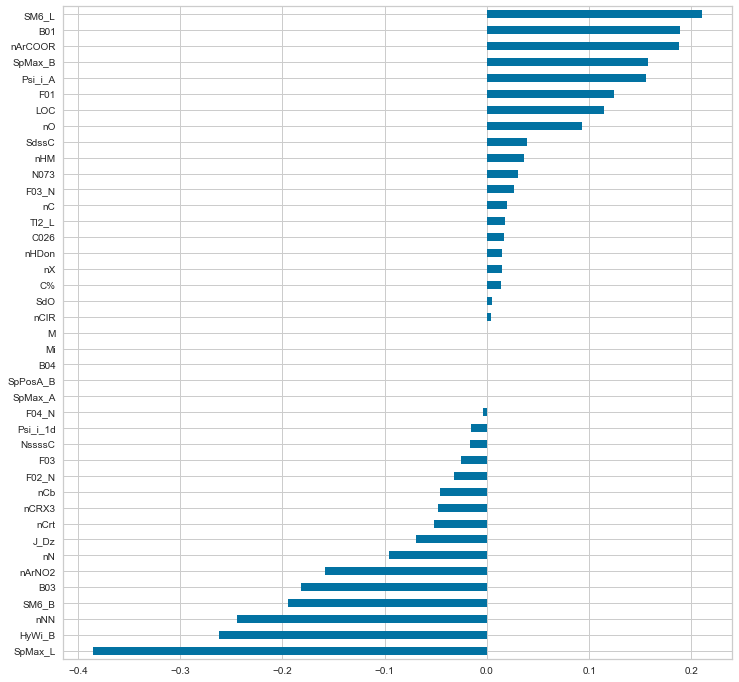

In [21]:
X=df.drop('experimental_class', axis=1)
y=df.experimental_class

selectorL=LassoCV()
selectorL.fit(X,y)
coef = pd.Series(selectorL.coef_, index=X.columns)
coef.sort_values().plot.barh(figsize=(12,12))

In [22]:
useless_col=['M','Mi','B04','SpPosA_B','SpMax_A']
df_lasso=df.drop(useless_col, axis=1)

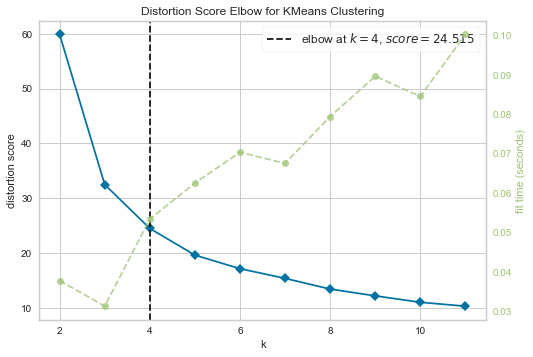

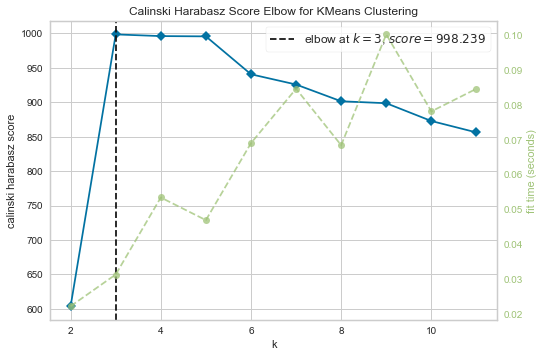

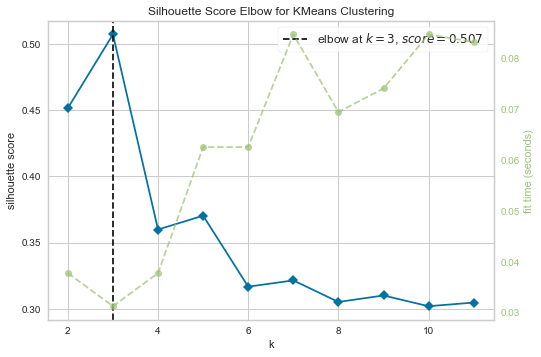

3


In [23]:
#creation of a cluster with the useless column
df_cluster=df[[c for c in df.columns if c in useless_col]]
model_c=KMeans()

#cluster with useless features, choice of k value after viz elbow visualiser
viz=KElbowVisualizer(model_c, k=(2,12))
viz.fit(df_cluster)
viz.show()
viz=KElbowVisualizer(model_c, k=(2,12), metric='calinski_harabasz')
viz.fit(df_cluster)
viz.show()
viz=KElbowVisualizer(model_c, k=(2,12), metric='silhouette')
viz.fit(df_cluster)
viz.show()
k = input()
k=int(k)
kmeans=KMeans(k)
kmeans.fit(df_cluster)
kmeans.predict(df_cluster)
df_lasso['cluster']=kmeans.predict(df_cluster)


KNeighborsClassifier(n_neighbors=3) : [0.762, 0.681, 0.706, 0.757, 0.662]
KNeighborsClassifier() : [0.729, 0.653, 0.682, 0.771, 0.662]
SVC() : [0.807, 0.75, 0.73, 0.857, 0.727]
GaussianNB() : [0.632, 0.55, 0.543, 0.523, 0.5]
DecisionTreeClassifier() : [0.731, 0.635, 0.675, 0.797, 0.667]
RandomForestClassifier() : [0.827, 0.852, 0.803, 0.875, 0.793]
RandomForestClassifier(class_weight='balanced') : [0.836, 0.855, 0.841, 0.892, 0.796]
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=

165:	learn: 0.3211837	total: 504ms	remaining: 2.53s
166:	learn: 0.3205868	total: 506ms	remaining: 2.52s
167:	learn: 0.3198293	total: 509ms	remaining: 2.52s
168:	learn: 0.3192268	total: 511ms	remaining: 2.51s
169:	learn: 0.3185390	total: 513ms	remaining: 2.5s
170:	learn: 0.3179250	total: 515ms	remaining: 2.5s
171:	learn: 0.3172625	total: 517ms	remaining: 2.49s
172:	learn: 0.3165540	total: 519ms	remaining: 2.48s
173:	learn: 0.3156711	total: 521ms	remaining: 2.48s
174:	learn: 0.3151667	total: 524ms	remaining: 2.47s
175:	learn: 0.3143129	total: 526ms	remaining: 2.46s
176:	learn: 0.3135740	total: 528ms	remaining: 2.46s
177:	learn: 0.3132141	total: 530ms	remaining: 2.45s
178:	learn: 0.3127320	total: 533ms	remaining: 2.44s
179:	learn: 0.3123256	total: 534ms	remaining: 2.43s
180:	learn: 0.3116801	total: 537ms	remaining: 2.43s
181:	learn: 0.3109627	total: 539ms	remaining: 2.42s
182:	learn: 0.3104702	total: 541ms	remaining: 2.42s
183:	learn: 0.3095576	total: 543ms	remaining: 2.41s
184:	learn: 0.

325:	learn: 0.2512161	total: 843ms	remaining: 1.74s
326:	learn: 0.2509889	total: 845ms	remaining: 1.74s
327:	learn: 0.2507268	total: 847ms	remaining: 1.73s
328:	learn: 0.2505497	total: 849ms	remaining: 1.73s
329:	learn: 0.2503614	total: 851ms	remaining: 1.73s
330:	learn: 0.2499786	total: 853ms	remaining: 1.72s
331:	learn: 0.2497352	total: 855ms	remaining: 1.72s
332:	learn: 0.2495157	total: 857ms	remaining: 1.72s
333:	learn: 0.2491593	total: 860ms	remaining: 1.71s
334:	learn: 0.2489813	total: 862ms	remaining: 1.71s
335:	learn: 0.2487505	total: 865ms	remaining: 1.71s
336:	learn: 0.2484335	total: 867ms	remaining: 1.7s
337:	learn: 0.2479016	total: 869ms	remaining: 1.7s
338:	learn: 0.2476745	total: 871ms	remaining: 1.7s
339:	learn: 0.2473771	total: 873ms	remaining: 1.69s
340:	learn: 0.2472059	total: 875ms	remaining: 1.69s
341:	learn: 0.2469095	total: 878ms	remaining: 1.69s
342:	learn: 0.2465750	total: 880ms	remaining: 1.68s
343:	learn: 0.2461284	total: 882ms	remaining: 1.68s
344:	learn: 0.2

491:	learn: 0.2128885	total: 1.19s	remaining: 1.22s
492:	learn: 0.2126617	total: 1.19s	remaining: 1.22s
493:	learn: 0.2124796	total: 1.19s	remaining: 1.22s
494:	learn: 0.2123448	total: 1.19s	remaining: 1.22s
495:	learn: 0.2121118	total: 1.19s	remaining: 1.21s
496:	learn: 0.2119662	total: 1.2s	remaining: 1.21s
497:	learn: 0.2117163	total: 1.2s	remaining: 1.21s
498:	learn: 0.2115788	total: 1.2s	remaining: 1.21s
499:	learn: 0.2114168	total: 1.2s	remaining: 1.2s
500:	learn: 0.2111888	total: 1.2s	remaining: 1.2s
501:	learn: 0.2109464	total: 1.21s	remaining: 1.2s
502:	learn: 0.2106045	total: 1.21s	remaining: 1.2s
503:	learn: 0.2104702	total: 1.21s	remaining: 1.19s
504:	learn: 0.2102744	total: 1.21s	remaining: 1.19s
505:	learn: 0.2101749	total: 1.22s	remaining: 1.19s
506:	learn: 0.2100209	total: 1.22s	remaining: 1.18s
507:	learn: 0.2097156	total: 1.22s	remaining: 1.18s
508:	learn: 0.2095841	total: 1.22s	remaining: 1.18s
509:	learn: 0.2094388	total: 1.22s	remaining: 1.18s
510:	learn: 0.2093487

651:	learn: 0.1848515	total: 1.52s	remaining: 813ms
652:	learn: 0.1846818	total: 1.52s	remaining: 810ms
653:	learn: 0.1843608	total: 1.53s	remaining: 808ms
654:	learn: 0.1842535	total: 1.53s	remaining: 806ms
655:	learn: 0.1840880	total: 1.53s	remaining: 803ms
656:	learn: 0.1839615	total: 1.53s	remaining: 801ms
657:	learn: 0.1838118	total: 1.54s	remaining: 799ms
658:	learn: 0.1836850	total: 1.54s	remaining: 796ms
659:	learn: 0.1834893	total: 1.54s	remaining: 794ms
660:	learn: 0.1832521	total: 1.54s	remaining: 791ms
661:	learn: 0.1830984	total: 1.54s	remaining: 789ms
662:	learn: 0.1829656	total: 1.55s	remaining: 786ms
663:	learn: 0.1829229	total: 1.55s	remaining: 784ms
664:	learn: 0.1827657	total: 1.55s	remaining: 781ms
665:	learn: 0.1825624	total: 1.55s	remaining: 779ms
666:	learn: 0.1824551	total: 1.55s	remaining: 777ms
667:	learn: 0.1823348	total: 1.56s	remaining: 774ms
668:	learn: 0.1821132	total: 1.56s	remaining: 772ms
669:	learn: 0.1819975	total: 1.56s	remaining: 769ms
670:	learn: 

812:	learn: 0.1579121	total: 1.87s	remaining: 430ms
813:	learn: 0.1577755	total: 1.87s	remaining: 428ms
814:	learn: 0.1577191	total: 1.87s	remaining: 425ms
815:	learn: 0.1575637	total: 1.88s	remaining: 423ms
816:	learn: 0.1574378	total: 1.88s	remaining: 421ms
817:	learn: 0.1573319	total: 1.88s	remaining: 419ms
818:	learn: 0.1571333	total: 1.88s	remaining: 416ms
819:	learn: 0.1570020	total: 1.89s	remaining: 414ms
820:	learn: 0.1567479	total: 1.89s	remaining: 412ms
821:	learn: 0.1565730	total: 1.89s	remaining: 409ms
822:	learn: 0.1564586	total: 1.89s	remaining: 407ms
823:	learn: 0.1564502	total: 1.89s	remaining: 405ms
824:	learn: 0.1562416	total: 1.9s	remaining: 402ms
825:	learn: 0.1560713	total: 1.9s	remaining: 400ms
826:	learn: 0.1559298	total: 1.9s	remaining: 398ms
827:	learn: 0.1557541	total: 1.9s	remaining: 395ms
828:	learn: 0.1556361	total: 1.91s	remaining: 393ms
829:	learn: 0.1555415	total: 1.91s	remaining: 391ms
830:	learn: 0.1554046	total: 1.91s	remaining: 388ms
831:	learn: 0.15

971:	learn: 0.1339865	total: 2.21s	remaining: 63.6ms
972:	learn: 0.1338954	total: 2.21s	remaining: 61.3ms
973:	learn: 0.1337703	total: 2.21s	remaining: 59.1ms
974:	learn: 0.1334720	total: 2.21s	remaining: 56.8ms
975:	learn: 0.1333648	total: 2.22s	remaining: 54.5ms
976:	learn: 0.1332134	total: 2.22s	remaining: 52.2ms
977:	learn: 0.1331497	total: 2.22s	remaining: 50ms
978:	learn: 0.1330564	total: 2.22s	remaining: 47.7ms
979:	learn: 0.1329064	total: 2.23s	remaining: 45.4ms
980:	learn: 0.1327969	total: 2.23s	remaining: 43.2ms
981:	learn: 0.1327696	total: 2.23s	remaining: 40.9ms
982:	learn: 0.1325819	total: 2.23s	remaining: 38.6ms
983:	learn: 0.1324129	total: 2.23s	remaining: 36.3ms
984:	learn: 0.1320874	total: 2.24s	remaining: 34.1ms
985:	learn: 0.1319419	total: 2.24s	remaining: 31.8ms
986:	learn: 0.1318253	total: 2.24s	remaining: 29.5ms
987:	learn: 0.1317260	total: 2.24s	remaining: 27.3ms
988:	learn: 0.1315258	total: 2.25s	remaining: 25ms
989:	learn: 0.1313901	total: 2.25s	remaining: 22.7

179:	learn: 0.3069927	total: 396ms	remaining: 1.8s
180:	learn: 0.3065704	total: 398ms	remaining: 1.8s
181:	learn: 0.3058473	total: 400ms	remaining: 1.8s
182:	learn: 0.3054639	total: 402ms	remaining: 1.8s
183:	learn: 0.3047986	total: 405ms	remaining: 1.79s
184:	learn: 0.3040210	total: 407ms	remaining: 1.79s
185:	learn: 0.3033214	total: 409ms	remaining: 1.79s
186:	learn: 0.3028665	total: 412ms	remaining: 1.79s
187:	learn: 0.3022512	total: 414ms	remaining: 1.79s
188:	learn: 0.3015832	total: 417ms	remaining: 1.79s
189:	learn: 0.3008596	total: 419ms	remaining: 1.78s
190:	learn: 0.3002593	total: 421ms	remaining: 1.78s
191:	learn: 0.2996186	total: 423ms	remaining: 1.78s
192:	learn: 0.2990067	total: 425ms	remaining: 1.78s
193:	learn: 0.2984914	total: 428ms	remaining: 1.78s
194:	learn: 0.2979890	total: 431ms	remaining: 1.78s
195:	learn: 0.2973833	total: 433ms	remaining: 1.78s
196:	learn: 0.2967367	total: 436ms	remaining: 1.78s
197:	learn: 0.2964312	total: 438ms	remaining: 1.77s
198:	learn: 0.29

411:	learn: 0.2198370	total: 908ms	remaining: 1.29s
412:	learn: 0.2197277	total: 910ms	remaining: 1.29s
413:	learn: 0.2196260	total: 912ms	remaining: 1.29s
414:	learn: 0.2191732	total: 914ms	remaining: 1.29s
415:	learn: 0.2189414	total: 916ms	remaining: 1.29s
416:	learn: 0.2187586	total: 919ms	remaining: 1.28s
417:	learn: 0.2185927	total: 922ms	remaining: 1.28s
418:	learn: 0.2184022	total: 924ms	remaining: 1.28s
419:	learn: 0.2181953	total: 926ms	remaining: 1.28s
420:	learn: 0.2178984	total: 928ms	remaining: 1.27s
421:	learn: 0.2176154	total: 930ms	remaining: 1.27s
422:	learn: 0.2173832	total: 932ms	remaining: 1.27s
423:	learn: 0.2171811	total: 934ms	remaining: 1.27s
424:	learn: 0.2170080	total: 936ms	remaining: 1.27s
425:	learn: 0.2167463	total: 938ms	remaining: 1.26s
426:	learn: 0.2165655	total: 941ms	remaining: 1.26s
427:	learn: 0.2164448	total: 943ms	remaining: 1.26s
428:	learn: 0.2162654	total: 945ms	remaining: 1.26s
429:	learn: 0.2160891	total: 947ms	remaining: 1.25s
430:	learn: 

647:	learn: 0.1725262	total: 1.41s	remaining: 767ms
648:	learn: 0.1723393	total: 1.42s	remaining: 765ms
649:	learn: 0.1722200	total: 1.42s	remaining: 763ms
650:	learn: 0.1720302	total: 1.42s	remaining: 761ms
651:	learn: 0.1717771	total: 1.42s	remaining: 759ms
652:	learn: 0.1715685	total: 1.42s	remaining: 756ms
653:	learn: 0.1713950	total: 1.43s	remaining: 754ms
654:	learn: 0.1710630	total: 1.43s	remaining: 752ms
655:	learn: 0.1709163	total: 1.43s	remaining: 750ms
656:	learn: 0.1708628	total: 1.43s	remaining: 748ms
657:	learn: 0.1706259	total: 1.43s	remaining: 745ms
658:	learn: 0.1704889	total: 1.44s	remaining: 743ms
659:	learn: 0.1700708	total: 1.44s	remaining: 741ms
660:	learn: 0.1699625	total: 1.44s	remaining: 739ms
661:	learn: 0.1697354	total: 1.44s	remaining: 737ms
662:	learn: 0.1694944	total: 1.45s	remaining: 735ms
663:	learn: 0.1693276	total: 1.45s	remaining: 732ms
664:	learn: 0.1691591	total: 1.45s	remaining: 730ms
665:	learn: 0.1689825	total: 1.45s	remaining: 728ms
666:	learn: 

869:	learn: 0.1334831	total: 1.92s	remaining: 287ms
870:	learn: 0.1333544	total: 1.92s	remaining: 285ms
871:	learn: 0.1332539	total: 1.93s	remaining: 283ms
872:	learn: 0.1331545	total: 1.93s	remaining: 281ms
873:	learn: 0.1329950	total: 1.93s	remaining: 278ms
874:	learn: 0.1328668	total: 1.93s	remaining: 276ms
875:	learn: 0.1327209	total: 1.94s	remaining: 274ms
876:	learn: 0.1325676	total: 1.94s	remaining: 272ms
877:	learn: 0.1324334	total: 1.94s	remaining: 270ms
878:	learn: 0.1322698	total: 1.94s	remaining: 267ms
879:	learn: 0.1322012	total: 1.95s	remaining: 265ms
880:	learn: 0.1320591	total: 1.95s	remaining: 263ms
881:	learn: 0.1318537	total: 1.95s	remaining: 261ms
882:	learn: 0.1317051	total: 1.95s	remaining: 259ms
883:	learn: 0.1315942	total: 1.95s	remaining: 256ms
884:	learn: 0.1314841	total: 1.96s	remaining: 254ms
885:	learn: 0.1313345	total: 1.96s	remaining: 252ms
886:	learn: 0.1311767	total: 1.96s	remaining: 250ms
887:	learn: 0.1310036	total: 1.96s	remaining: 248ms
888:	learn: 

81:	learn: 0.4004475	total: 183ms	remaining: 2.04s
82:	learn: 0.3989351	total: 185ms	remaining: 2.04s
83:	learn: 0.3975851	total: 187ms	remaining: 2.04s
84:	learn: 0.3962346	total: 189ms	remaining: 2.04s
85:	learn: 0.3948397	total: 191ms	remaining: 2.03s
86:	learn: 0.3932118	total: 193ms	remaining: 2.03s
87:	learn: 0.3919636	total: 196ms	remaining: 2.03s
88:	learn: 0.3904334	total: 199ms	remaining: 2.03s
89:	learn: 0.3888380	total: 201ms	remaining: 2.04s
90:	learn: 0.3872608	total: 203ms	remaining: 2.03s
91:	learn: 0.3857564	total: 205ms	remaining: 2.03s
92:	learn: 0.3842885	total: 207ms	remaining: 2.02s
93:	learn: 0.3831823	total: 210ms	remaining: 2.02s
94:	learn: 0.3815484	total: 213ms	remaining: 2.02s
95:	learn: 0.3799069	total: 215ms	remaining: 2.02s
96:	learn: 0.3780817	total: 217ms	remaining: 2.02s
97:	learn: 0.3765989	total: 219ms	remaining: 2.02s
98:	learn: 0.3752701	total: 221ms	remaining: 2.01s
99:	learn: 0.3738882	total: 223ms	remaining: 2.01s
100:	learn: 0.3727459	total: 22

240:	learn: 0.2691385	total: 535ms	remaining: 1.68s
241:	learn: 0.2688113	total: 537ms	remaining: 1.68s
242:	learn: 0.2683226	total: 539ms	remaining: 1.68s
243:	learn: 0.2677476	total: 541ms	remaining: 1.68s
244:	learn: 0.2672402	total: 543ms	remaining: 1.67s
245:	learn: 0.2667954	total: 546ms	remaining: 1.67s
246:	learn: 0.2665063	total: 549ms	remaining: 1.67s
247:	learn: 0.2660700	total: 551ms	remaining: 1.67s
248:	learn: 0.2656544	total: 553ms	remaining: 1.67s
249:	learn: 0.2650382	total: 555ms	remaining: 1.66s
250:	learn: 0.2646728	total: 557ms	remaining: 1.66s
251:	learn: 0.2644587	total: 559ms	remaining: 1.66s
252:	learn: 0.2639371	total: 562ms	remaining: 1.66s
253:	learn: 0.2636374	total: 564ms	remaining: 1.66s
254:	learn: 0.2633314	total: 566ms	remaining: 1.65s
255:	learn: 0.2629114	total: 568ms	remaining: 1.65s
256:	learn: 0.2624031	total: 570ms	remaining: 1.65s
257:	learn: 0.2620597	total: 572ms	remaining: 1.65s
258:	learn: 0.2617258	total: 575ms	remaining: 1.64s
259:	learn: 

477:	learn: 0.2016447	total: 1.04s	remaining: 1.14s
478:	learn: 0.2014049	total: 1.05s	remaining: 1.14s
479:	learn: 0.2012211	total: 1.05s	remaining: 1.14s
480:	learn: 0.2011080	total: 1.05s	remaining: 1.13s
481:	learn: 0.2008817	total: 1.05s	remaining: 1.13s
482:	learn: 0.2007358	total: 1.05s	remaining: 1.13s
483:	learn: 0.2005877	total: 1.06s	remaining: 1.13s
484:	learn: 0.2003495	total: 1.06s	remaining: 1.13s
485:	learn: 0.2001867	total: 1.06s	remaining: 1.12s
486:	learn: 0.2000340	total: 1.06s	remaining: 1.12s
487:	learn: 0.1998196	total: 1.07s	remaining: 1.12s
488:	learn: 0.1995021	total: 1.07s	remaining: 1.12s
489:	learn: 0.1993178	total: 1.07s	remaining: 1.11s
490:	learn: 0.1992379	total: 1.07s	remaining: 1.11s
491:	learn: 0.1990986	total: 1.08s	remaining: 1.11s
492:	learn: 0.1987891	total: 1.08s	remaining: 1.11s
493:	learn: 0.1985223	total: 1.08s	remaining: 1.11s
494:	learn: 0.1983515	total: 1.08s	remaining: 1.1s
495:	learn: 0.1981210	total: 1.08s	remaining: 1.1s
496:	learn: 0.

684:	learn: 0.1633446	total: 1.54s	remaining: 708ms
685:	learn: 0.1632789	total: 1.54s	remaining: 706ms
686:	learn: 0.1631021	total: 1.54s	remaining: 704ms
687:	learn: 0.1630341	total: 1.55s	remaining: 701ms
688:	learn: 0.1629667	total: 1.55s	remaining: 699ms
689:	learn: 0.1628001	total: 1.55s	remaining: 697ms
690:	learn: 0.1627760	total: 1.55s	remaining: 694ms
691:	learn: 0.1626798	total: 1.55s	remaining: 692ms
692:	learn: 0.1625661	total: 1.56s	remaining: 690ms
693:	learn: 0.1624650	total: 1.56s	remaining: 688ms
694:	learn: 0.1622803	total: 1.56s	remaining: 685ms
695:	learn: 0.1620507	total: 1.56s	remaining: 683ms
696:	learn: 0.1618987	total: 1.56s	remaining: 681ms
697:	learn: 0.1616963	total: 1.57s	remaining: 678ms
698:	learn: 0.1615367	total: 1.57s	remaining: 676ms
699:	learn: 0.1613946	total: 1.57s	remaining: 674ms
700:	learn: 0.1613424	total: 1.57s	remaining: 671ms
701:	learn: 0.1612082	total: 1.58s	remaining: 669ms
702:	learn: 0.1609748	total: 1.58s	remaining: 667ms
703:	learn: 

907:	learn: 0.1270553	total: 2.05s	remaining: 208ms
908:	learn: 0.1270158	total: 2.05s	remaining: 206ms
909:	learn: 0.1269169	total: 2.05s	remaining: 203ms
910:	learn: 0.1266775	total: 2.06s	remaining: 201ms
911:	learn: 0.1265682	total: 2.06s	remaining: 199ms
912:	learn: 0.1263412	total: 2.06s	remaining: 197ms
913:	learn: 0.1262721	total: 2.07s	remaining: 194ms
914:	learn: 0.1260935	total: 2.07s	remaining: 192ms
915:	learn: 0.1259196	total: 2.07s	remaining: 190ms
916:	learn: 0.1258208	total: 2.07s	remaining: 188ms
917:	learn: 0.1255626	total: 2.08s	remaining: 186ms
918:	learn: 0.1254040	total: 2.08s	remaining: 183ms
919:	learn: 0.1252521	total: 2.08s	remaining: 181ms
920:	learn: 0.1251377	total: 2.08s	remaining: 179ms
921:	learn: 0.1249316	total: 2.08s	remaining: 176ms
922:	learn: 0.1247253	total: 2.09s	remaining: 174ms
923:	learn: 0.1246097	total: 2.09s	remaining: 172ms
924:	learn: 0.1244148	total: 2.09s	remaining: 170ms
925:	learn: 0.1242817	total: 2.1s	remaining: 168ms
926:	learn: 0

104:	learn: 0.3724336	total: 235ms	remaining: 2.01s
105:	learn: 0.3713321	total: 238ms	remaining: 2s
106:	learn: 0.3703555	total: 240ms	remaining: 2s
107:	learn: 0.3693317	total: 242ms	remaining: 1.99s
108:	learn: 0.3683031	total: 244ms	remaining: 1.99s
109:	learn: 0.3675514	total: 246ms	remaining: 1.99s
110:	learn: 0.3659990	total: 249ms	remaining: 1.99s
111:	learn: 0.3648250	total: 251ms	remaining: 1.99s
112:	learn: 0.3636762	total: 253ms	remaining: 1.99s
113:	learn: 0.3622663	total: 255ms	remaining: 1.98s
114:	learn: 0.3613575	total: 257ms	remaining: 1.98s
115:	learn: 0.3600469	total: 260ms	remaining: 1.98s
116:	learn: 0.3589244	total: 262ms	remaining: 1.98s
117:	learn: 0.3577003	total: 264ms	remaining: 1.98s
118:	learn: 0.3573069	total: 266ms	remaining: 1.97s
119:	learn: 0.3560150	total: 268ms	remaining: 1.97s
120:	learn: 0.3552933	total: 271ms	remaining: 1.97s
121:	learn: 0.3546588	total: 273ms	remaining: 1.96s
122:	learn: 0.3537199	total: 275ms	remaining: 1.96s
123:	learn: 0.3529

328:	learn: 0.2444735	total: 736ms	remaining: 1.5s
329:	learn: 0.2441648	total: 738ms	remaining: 1.5s
330:	learn: 0.2437872	total: 740ms	remaining: 1.5s
331:	learn: 0.2434527	total: 742ms	remaining: 1.49s
332:	learn: 0.2431826	total: 744ms	remaining: 1.49s
333:	learn: 0.2429942	total: 747ms	remaining: 1.49s
334:	learn: 0.2424974	total: 749ms	remaining: 1.49s
335:	learn: 0.2422974	total: 751ms	remaining: 1.48s
336:	learn: 0.2420397	total: 753ms	remaining: 1.48s
337:	learn: 0.2418283	total: 755ms	remaining: 1.48s
338:	learn: 0.2417390	total: 757ms	remaining: 1.48s
339:	learn: 0.2415018	total: 760ms	remaining: 1.47s
340:	learn: 0.2409606	total: 762ms	remaining: 1.47s
341:	learn: 0.2407929	total: 764ms	remaining: 1.47s
342:	learn: 0.2403878	total: 766ms	remaining: 1.47s
343:	learn: 0.2402477	total: 768ms	remaining: 1.47s
344:	learn: 0.2399448	total: 770ms	remaining: 1.46s
345:	learn: 0.2396213	total: 772ms	remaining: 1.46s
346:	learn: 0.2394018	total: 774ms	remaining: 1.46s
347:	learn: 0.2

493:	learn: 0.2029926	total: 1.09s	remaining: 1.11s
494:	learn: 0.2028561	total: 1.09s	remaining: 1.11s
495:	learn: 0.2026765	total: 1.09s	remaining: 1.11s
496:	learn: 0.2024684	total: 1.09s	remaining: 1.11s
497:	learn: 0.2022201	total: 1.09s	remaining: 1.1s
498:	learn: 0.2021227	total: 1.1s	remaining: 1.1s
499:	learn: 0.2019623	total: 1.1s	remaining: 1.1s
500:	learn: 0.2016936	total: 1.1s	remaining: 1.1s
501:	learn: 0.2014420	total: 1.1s	remaining: 1.09s
502:	learn: 0.2013493	total: 1.11s	remaining: 1.09s
503:	learn: 0.2012203	total: 1.11s	remaining: 1.09s
504:	learn: 0.2009275	total: 1.11s	remaining: 1.09s
505:	learn: 0.2005939	total: 1.11s	remaining: 1.09s
506:	learn: 0.2003533	total: 1.11s	remaining: 1.08s
507:	learn: 0.2001764	total: 1.12s	remaining: 1.08s
508:	learn: 0.1999282	total: 1.12s	remaining: 1.08s
509:	learn: 0.1994891	total: 1.12s	remaining: 1.08s
510:	learn: 0.1992877	total: 1.12s	remaining: 1.07s
511:	learn: 0.1990977	total: 1.13s	remaining: 1.07s
512:	learn: 0.198908

739:	learn: 0.1566122	total: 1.6s	remaining: 563ms
740:	learn: 0.1563311	total: 1.6s	remaining: 561ms
741:	learn: 0.1562050	total: 1.61s	remaining: 558ms
742:	learn: 0.1560433	total: 1.61s	remaining: 556ms
743:	learn: 0.1557579	total: 1.61s	remaining: 554ms
744:	learn: 0.1555921	total: 1.61s	remaining: 552ms
745:	learn: 0.1554316	total: 1.61s	remaining: 550ms
746:	learn: 0.1552228	total: 1.62s	remaining: 548ms
747:	learn: 0.1549085	total: 1.62s	remaining: 546ms
748:	learn: 0.1547174	total: 1.62s	remaining: 543ms
749:	learn: 0.1546261	total: 1.62s	remaining: 541ms
750:	learn: 0.1544758	total: 1.63s	remaining: 539ms
751:	learn: 0.1544570	total: 1.63s	remaining: 537ms
752:	learn: 0.1543616	total: 1.63s	remaining: 536ms
753:	learn: 0.1541327	total: 1.64s	remaining: 534ms
754:	learn: 0.1539015	total: 1.64s	remaining: 532ms
755:	learn: 0.1538139	total: 1.64s	remaining: 529ms
756:	learn: 0.1537294	total: 1.64s	remaining: 527ms
757:	learn: 0.1534798	total: 1.64s	remaining: 525ms
758:	learn: 0.

899:	learn: 0.1313341	total: 1.94s	remaining: 216ms
900:	learn: 0.1311609	total: 1.94s	remaining: 213ms
901:	learn: 0.1309541	total: 1.94s	remaining: 211ms
902:	learn: 0.1307663	total: 1.95s	remaining: 209ms
903:	learn: 0.1306992	total: 1.95s	remaining: 207ms
904:	learn: 0.1306224	total: 1.95s	remaining: 205ms
905:	learn: 0.1304096	total: 1.95s	remaining: 203ms
906:	learn: 0.1301981	total: 1.96s	remaining: 201ms
907:	learn: 0.1300607	total: 1.96s	remaining: 198ms
908:	learn: 0.1299903	total: 1.96s	remaining: 196ms
909:	learn: 0.1298681	total: 1.96s	remaining: 194ms
910:	learn: 0.1298037	total: 1.97s	remaining: 192ms
911:	learn: 0.1296217	total: 1.97s	remaining: 190ms
912:	learn: 0.1294643	total: 1.97s	remaining: 188ms
913:	learn: 0.1294036	total: 1.97s	remaining: 185ms
914:	learn: 0.1293015	total: 1.97s	remaining: 183ms
915:	learn: 0.1291717	total: 1.98s	remaining: 181ms
916:	learn: 0.1290693	total: 1.98s	remaining: 179ms
917:	learn: 0.1288894	total: 1.98s	remaining: 177ms
918:	learn: 

110:	learn: 0.3540850	total: 241ms	remaining: 1.93s
111:	learn: 0.3532138	total: 243ms	remaining: 1.93s
112:	learn: 0.3519048	total: 246ms	remaining: 1.93s
113:	learn: 0.3505059	total: 248ms	remaining: 1.93s
114:	learn: 0.3494388	total: 250ms	remaining: 1.93s
115:	learn: 0.3485072	total: 252ms	remaining: 1.92s
116:	learn: 0.3475201	total: 255ms	remaining: 1.92s
117:	learn: 0.3459091	total: 257ms	remaining: 1.92s
118:	learn: 0.3449600	total: 259ms	remaining: 1.92s
119:	learn: 0.3437299	total: 261ms	remaining: 1.92s
120:	learn: 0.3426505	total: 264ms	remaining: 1.91s
121:	learn: 0.3418518	total: 266ms	remaining: 1.91s
122:	learn: 0.3410653	total: 268ms	remaining: 1.91s
123:	learn: 0.3402958	total: 270ms	remaining: 1.91s
124:	learn: 0.3394400	total: 273ms	remaining: 1.91s
125:	learn: 0.3384514	total: 275ms	remaining: 1.91s
126:	learn: 0.3372929	total: 278ms	remaining: 1.91s
127:	learn: 0.3363618	total: 280ms	remaining: 1.91s
128:	learn: 0.3352311	total: 283ms	remaining: 1.91s
129:	learn: 

343:	learn: 0.2296489	total: 752ms	remaining: 1.43s
344:	learn: 0.2292875	total: 755ms	remaining: 1.43s
345:	learn: 0.2290362	total: 757ms	remaining: 1.43s
346:	learn: 0.2288331	total: 759ms	remaining: 1.43s
347:	learn: 0.2286558	total: 762ms	remaining: 1.43s
348:	learn: 0.2284393	total: 764ms	remaining: 1.43s
349:	learn: 0.2282125	total: 767ms	remaining: 1.42s
350:	learn: 0.2279878	total: 769ms	remaining: 1.42s
351:	learn: 0.2278351	total: 771ms	remaining: 1.42s
352:	learn: 0.2274795	total: 774ms	remaining: 1.42s
353:	learn: 0.2273486	total: 776ms	remaining: 1.42s
354:	learn: 0.2271961	total: 778ms	remaining: 1.41s
355:	learn: 0.2268863	total: 780ms	remaining: 1.41s
356:	learn: 0.2265782	total: 782ms	remaining: 1.41s
357:	learn: 0.2263213	total: 784ms	remaining: 1.41s
358:	learn: 0.2261043	total: 787ms	remaining: 1.4s
359:	learn: 0.2258010	total: 789ms	remaining: 1.4s
360:	learn: 0.2253911	total: 791ms	remaining: 1.4s
361:	learn: 0.2251203	total: 794ms	remaining: 1.4s
362:	learn: 0.22

572:	learn: 0.1808822	total: 1.27s	remaining: 946ms
573:	learn: 0.1807440	total: 1.27s	remaining: 943ms
574:	learn: 0.1806482	total: 1.27s	remaining: 941ms
575:	learn: 0.1804672	total: 1.28s	remaining: 939ms
576:	learn: 0.1803517	total: 1.28s	remaining: 938ms
577:	learn: 0.1800451	total: 1.28s	remaining: 935ms
578:	learn: 0.1798743	total: 1.28s	remaining: 933ms
579:	learn: 0.1795520	total: 1.28s	remaining: 931ms
580:	learn: 0.1794622	total: 1.29s	remaining: 929ms
581:	learn: 0.1792350	total: 1.29s	remaining: 927ms
582:	learn: 0.1789888	total: 1.29s	remaining: 924ms
583:	learn: 0.1788332	total: 1.29s	remaining: 922ms
584:	learn: 0.1786087	total: 1.3s	remaining: 920ms
585:	learn: 0.1784285	total: 1.3s	remaining: 917ms
586:	learn: 0.1782633	total: 1.3s	remaining: 915ms
587:	learn: 0.1781481	total: 1.3s	remaining: 912ms
588:	learn: 0.1780749	total: 1.3s	remaining: 910ms
589:	learn: 0.1777838	total: 1.31s	remaining: 908ms
590:	learn: 0.1775868	total: 1.31s	remaining: 906ms
591:	learn: 0.177

807:	learn: 0.1407517	total: 1.78s	remaining: 423ms
808:	learn: 0.1407217	total: 1.78s	remaining: 421ms
809:	learn: 0.1405162	total: 1.78s	remaining: 418ms
810:	learn: 0.1403925	total: 1.78s	remaining: 416ms
811:	learn: 0.1401874	total: 1.79s	remaining: 414ms
812:	learn: 0.1401072	total: 1.79s	remaining: 412ms
813:	learn: 0.1400021	total: 1.79s	remaining: 409ms
814:	learn: 0.1398190	total: 1.79s	remaining: 407ms
815:	learn: 0.1396910	total: 1.8s	remaining: 405ms
816:	learn: 0.1395214	total: 1.8s	remaining: 403ms
817:	learn: 0.1393997	total: 1.8s	remaining: 401ms
818:	learn: 0.1392852	total: 1.8s	remaining: 398ms
819:	learn: 0.1392249	total: 1.8s	remaining: 396ms
820:	learn: 0.1389246	total: 1.81s	remaining: 394ms
821:	learn: 0.1387553	total: 1.81s	remaining: 392ms
822:	learn: 0.1384945	total: 1.81s	remaining: 390ms
823:	learn: 0.1381737	total: 1.81s	remaining: 387ms
824:	learn: 0.1380194	total: 1.81s	remaining: 385ms
825:	learn: 0.1377896	total: 1.82s	remaining: 383ms
826:	learn: 0.137

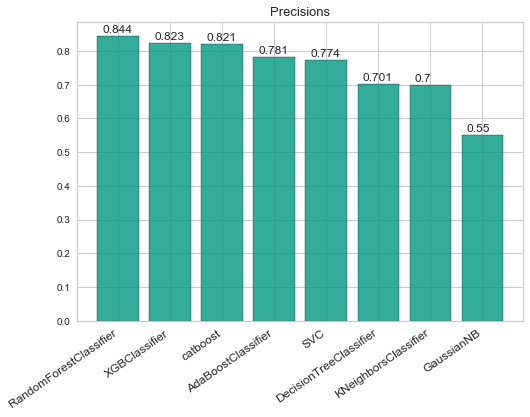

,precision,accuracy,recall,f1
RandomForestClassifier,0.844,0.869,0.747,0.792
XGBClassifier,0.823,0.862,0.748,0.783
catboost,0.821,0.864,0.763,0.790
AdaBoostClassifier,0.781,0.848,0.765,0.772
SVC,0.774,0.806,0.596,0.673
DecisionTreeClassifier,0.701,0.799,0.709,0.704
KNeighborsClassifier,0.700,0.807,0.745,0.720
GaussianNB,0.550,0.718,0.937,0.692


In [24]:
f_cross(df_lasso)

### Cross validation with features selection : Ridge

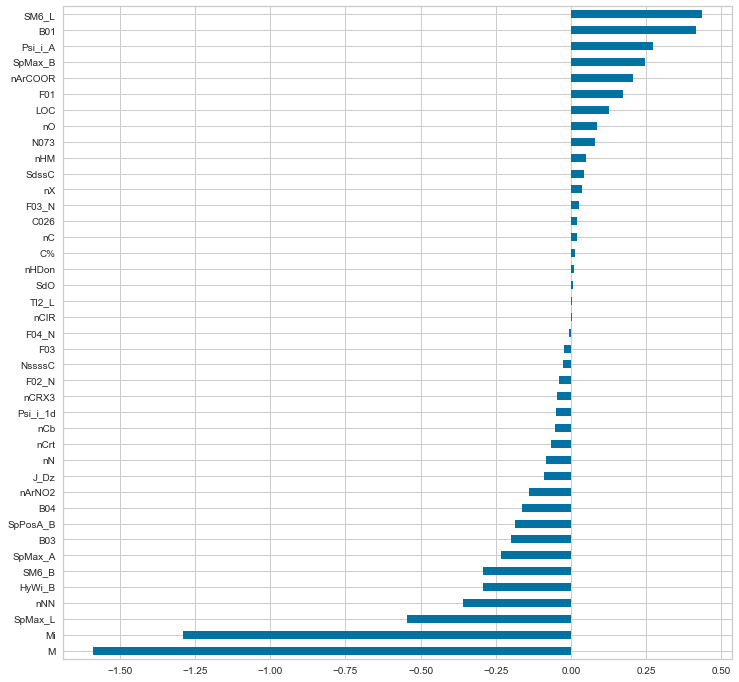

In [29]:
selectorL=RidgeCV()
selectorL.fit(X,y)
coef = pd.Series(selectorL.coef_, index=X.columns)
coef.sort_values().plot.barh(figsize=(12,12))
#any useless column here

### Definition of a function 'cluster'

In [25]:
"""Function which :
makes clusters with Kmeans with the useless features 
& allows to choose the best number of clusters according to 3 metrics
input: 
dataframe, list of useless column
Output:
Returns a new dataframe with important features & clusters"""

def f_cluster(df, useless_col):
    
    #creation of a new dataframe df_cluster with useless features
    df_cluster=df[[c for c in df.columns if c in useless_col]]
    model_c=KMeans()
    
    df2=df.drop(useless_col, axis=1)

    #cluster with useless features, choice of k value after viz elbow visualiser
    viz=KElbowVisualizer(model_c, k=(2,12))
    viz.fit(df_cluster)
    viz.show()
    viz=KElbowVisualizer(model_c, k=(2,12), metric='calinski_harabasz')
    viz.fit(df_cluster)
    viz.show()
    viz=KElbowVisualizer(model_c, k=(2,12), metric='silhouette')
    viz.fit(df_cluster)
    viz.show()
    k = input()
    k=int(k)
    kmeans=KMeans(k)
    kmeans.fit(df_cluster)
    kmeans.predict(df_cluster)
    df2['cluster']=kmeans.predict(df_cluster)
    return df2

### Cross validation with feature selection for the model with best performances: Random Forest, using RFE feature selection

In [26]:
#RFE for feature selection using best model : Random Forest
estimator=RandomForestClassifier()
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, y)
X=df.drop('experimental_class',axis=1)
y=df.experimental_class
selection_model=list(X.columns[selector.support_])
selection_model.append('experimental_class')
df_model=df[[c for c in df.columns if c in selection_model]]
useless_col=[c for c in df.columns if c not in selection_model]

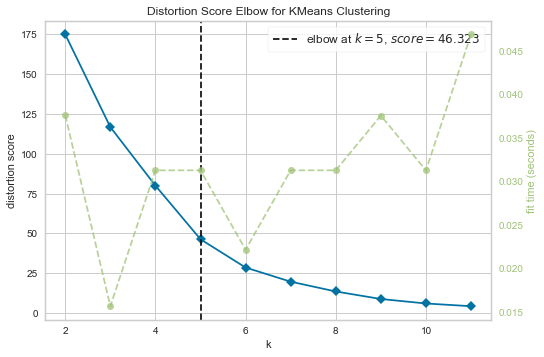

C:\Users\auror\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\auror\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\auror\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


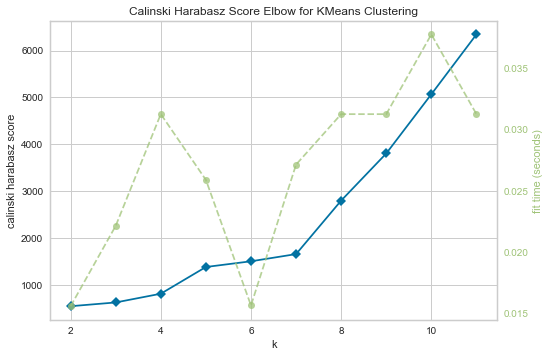

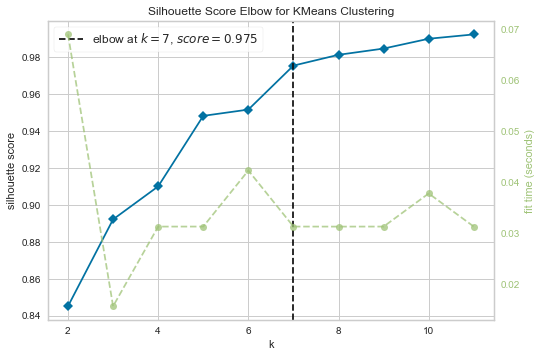

5


In [32]:
df_RF_RFE=f_cluster(df, useless_col)

KNeighborsClassifier(n_neighbors=3) : [0.771, 0.696, 0.69, 0.757, 0.662]
KNeighborsClassifier() : [0.729, 0.653, 0.682, 0.771, 0.667]
SVC() : [0.807, 0.773, 0.723, 0.857, 0.727]
GaussianNB() : [0.608, 0.565, 0.547, 0.548, 0.513]
DecisionTreeClassifier() : [0.725, 0.635, 0.695, 0.765, 0.651]
RandomForestClassifier() : [0.861, 0.836, 0.829, 0.879, 0.836]
RandomForestClassifier(class_weight='balanced') : [0.845, 0.878, 0.838, 0.873, 0.836]
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_paramet

211:	learn: 0.2894013	total: 477ms	remaining: 1.77s
212:	learn: 0.2889020	total: 480ms	remaining: 1.77s
213:	learn: 0.2885861	total: 482ms	remaining: 1.77s
214:	learn: 0.2880861	total: 484ms	remaining: 1.77s
215:	learn: 0.2876847	total: 486ms	remaining: 1.76s
216:	learn: 0.2872365	total: 489ms	remaining: 1.76s
217:	learn: 0.2867334	total: 492ms	remaining: 1.76s
218:	learn: 0.2863432	total: 494ms	remaining: 1.76s
219:	learn: 0.2856982	total: 497ms	remaining: 1.76s
220:	learn: 0.2852612	total: 499ms	remaining: 1.76s
221:	learn: 0.2847274	total: 501ms	remaining: 1.75s
222:	learn: 0.2843920	total: 504ms	remaining: 1.75s
223:	learn: 0.2840070	total: 506ms	remaining: 1.75s
224:	learn: 0.2836337	total: 508ms	remaining: 1.75s
225:	learn: 0.2832709	total: 510ms	remaining: 1.75s
226:	learn: 0.2828920	total: 513ms	remaining: 1.75s
227:	learn: 0.2823765	total: 515ms	remaining: 1.74s
228:	learn: 0.2816826	total: 518ms	remaining: 1.74s
229:	learn: 0.2813703	total: 520ms	remaining: 1.74s
230:	learn: 

442:	learn: 0.2159332	total: 976ms	remaining: 1.23s
443:	learn: 0.2155573	total: 978ms	remaining: 1.22s
444:	learn: 0.2152244	total: 980ms	remaining: 1.22s
445:	learn: 0.2150785	total: 983ms	remaining: 1.22s
446:	learn: 0.2148371	total: 986ms	remaining: 1.22s
447:	learn: 0.2145361	total: 988ms	remaining: 1.22s
448:	learn: 0.2143191	total: 991ms	remaining: 1.22s
449:	learn: 0.2139714	total: 993ms	remaining: 1.21s
450:	learn: 0.2137302	total: 995ms	remaining: 1.21s
451:	learn: 0.2135641	total: 998ms	remaining: 1.21s
452:	learn: 0.2133405	total: 1s	remaining: 1.21s
453:	learn: 0.2130674	total: 1s	remaining: 1.21s
454:	learn: 0.2128622	total: 1s	remaining: 1.2s
455:	learn: 0.2126381	total: 1.01s	remaining: 1.2s
456:	learn: 0.2124185	total: 1.01s	remaining: 1.2s
457:	learn: 0.2122082	total: 1.01s	remaining: 1.2s
458:	learn: 0.2118204	total: 1.01s	remaining: 1.19s
459:	learn: 0.2116078	total: 1.01s	remaining: 1.19s
460:	learn: 0.2113134	total: 1.02s	remaining: 1.19s
461:	learn: 0.2109556	tot

666:	learn: 0.1704915	total: 1.48s	remaining: 740ms
667:	learn: 0.1703652	total: 1.48s	remaining: 738ms
668:	learn: 0.1702783	total: 1.49s	remaining: 736ms
669:	learn: 0.1701694	total: 1.49s	remaining: 734ms
670:	learn: 0.1699973	total: 1.49s	remaining: 732ms
671:	learn: 0.1699364	total: 1.5s	remaining: 730ms
672:	learn: 0.1697962	total: 1.5s	remaining: 728ms
673:	learn: 0.1697179	total: 1.5s	remaining: 725ms
674:	learn: 0.1695303	total: 1.5s	remaining: 723ms
675:	learn: 0.1694497	total: 1.5s	remaining: 721ms
676:	learn: 0.1691956	total: 1.51s	remaining: 719ms
677:	learn: 0.1690404	total: 1.51s	remaining: 717ms
678:	learn: 0.1687707	total: 1.51s	remaining: 715ms
679:	learn: 0.1685018	total: 1.51s	remaining: 713ms
680:	learn: 0.1684738	total: 1.52s	remaining: 710ms
681:	learn: 0.1683024	total: 1.52s	remaining: 708ms
682:	learn: 0.1680809	total: 1.52s	remaining: 706ms
683:	learn: 0.1679054	total: 1.52s	remaining: 704ms
684:	learn: 0.1677067	total: 1.52s	remaining: 701ms
685:	learn: 0.167

824:	learn: 0.1457041	total: 1.83s	remaining: 388ms
825:	learn: 0.1455593	total: 1.83s	remaining: 386ms
826:	learn: 0.1453984	total: 1.83s	remaining: 383ms
827:	learn: 0.1452437	total: 1.83s	remaining: 381ms
828:	learn: 0.1450261	total: 1.84s	remaining: 379ms
829:	learn: 0.1448596	total: 1.84s	remaining: 377ms
830:	learn: 0.1447147	total: 1.84s	remaining: 375ms
831:	learn: 0.1446339	total: 1.84s	remaining: 372ms
832:	learn: 0.1443950	total: 1.85s	remaining: 370ms
833:	learn: 0.1443763	total: 1.85s	remaining: 368ms
834:	learn: 0.1442492	total: 1.85s	remaining: 366ms
835:	learn: 0.1441540	total: 1.85s	remaining: 364ms
836:	learn: 0.1440418	total: 1.85s	remaining: 361ms
837:	learn: 0.1439227	total: 1.86s	remaining: 359ms
838:	learn: 0.1439115	total: 1.86s	remaining: 357ms
839:	learn: 0.1437968	total: 1.86s	remaining: 355ms
840:	learn: 0.1436019	total: 1.86s	remaining: 352ms
841:	learn: 0.1433950	total: 1.87s	remaining: 350ms
842:	learn: 0.1432267	total: 1.87s	remaining: 348ms
843:	learn: 

7:	learn: 0.6448566	total: 50.5ms	remaining: 6.26s
8:	learn: 0.6397880	total: 54.9ms	remaining: 6.04s
9:	learn: 0.6331144	total: 59ms	remaining: 5.84s
10:	learn: 0.6265614	total: 64.8ms	remaining: 5.83s
11:	learn: 0.6198953	total: 70.7ms	remaining: 5.82s
12:	learn: 0.6136086	total: 75.2ms	remaining: 5.71s
13:	learn: 0.6086652	total: 80ms	remaining: 5.63s
14:	learn: 0.6034593	total: 84.5ms	remaining: 5.55s
15:	learn: 0.5979597	total: 88.3ms	remaining: 5.43s
16:	learn: 0.5933678	total: 91ms	remaining: 5.26s
17:	learn: 0.5887107	total: 95.5ms	remaining: 5.21s
18:	learn: 0.5830344	total: 98.5ms	remaining: 5.09s
19:	learn: 0.5780525	total: 101ms	remaining: 4.95s
20:	learn: 0.5728411	total: 103ms	remaining: 4.81s
21:	learn: 0.5682325	total: 106ms	remaining: 4.69s
22:	learn: 0.5633220	total: 109ms	remaining: 4.61s
23:	learn: 0.5586402	total: 112ms	remaining: 4.55s
24:	learn: 0.5538499	total: 114ms	remaining: 4.45s
25:	learn: 0.5491047	total: 117ms	remaining: 4.38s
26:	learn: 0.5449260	total: 

191:	learn: 0.2923697	total: 545ms	remaining: 2.29s
192:	learn: 0.2919630	total: 547ms	remaining: 2.29s
193:	learn: 0.2911012	total: 550ms	remaining: 2.28s
194:	learn: 0.2901727	total: 552ms	remaining: 2.28s
195:	learn: 0.2895188	total: 555ms	remaining: 2.28s
196:	learn: 0.2888803	total: 559ms	remaining: 2.28s
197:	learn: 0.2883582	total: 561ms	remaining: 2.27s
198:	learn: 0.2880239	total: 563ms	remaining: 2.27s
199:	learn: 0.2874075	total: 565ms	remaining: 2.26s
200:	learn: 0.2867203	total: 567ms	remaining: 2.25s
201:	learn: 0.2864264	total: 571ms	remaining: 2.25s
202:	learn: 0.2858579	total: 574ms	remaining: 2.25s
203:	learn: 0.2855740	total: 576ms	remaining: 2.25s
204:	learn: 0.2849603	total: 578ms	remaining: 2.24s
205:	learn: 0.2845406	total: 580ms	remaining: 2.23s
206:	learn: 0.2839505	total: 582ms	remaining: 2.23s
207:	learn: 0.2834348	total: 585ms	remaining: 2.23s
208:	learn: 0.2827295	total: 588ms	remaining: 2.23s
209:	learn: 0.2823701	total: 591ms	remaining: 2.22s
210:	learn: 

399:	learn: 0.2177403	total: 1.05s	remaining: 1.58s
400:	learn: 0.2174973	total: 1.06s	remaining: 1.58s
401:	learn: 0.2174267	total: 1.06s	remaining: 1.58s
402:	learn: 0.2172902	total: 1.06s	remaining: 1.57s
403:	learn: 0.2171666	total: 1.06s	remaining: 1.57s
404:	learn: 0.2168072	total: 1.07s	remaining: 1.57s
405:	learn: 0.2164727	total: 1.07s	remaining: 1.56s
406:	learn: 0.2160675	total: 1.07s	remaining: 1.56s
407:	learn: 0.2158662	total: 1.07s	remaining: 1.56s
408:	learn: 0.2156401	total: 1.08s	remaining: 1.56s
409:	learn: 0.2153669	total: 1.08s	remaining: 1.55s
410:	learn: 0.2152393	total: 1.08s	remaining: 1.55s
411:	learn: 0.2151332	total: 1.08s	remaining: 1.55s
412:	learn: 0.2149294	total: 1.09s	remaining: 1.54s
413:	learn: 0.2147219	total: 1.09s	remaining: 1.54s
414:	learn: 0.2145095	total: 1.09s	remaining: 1.54s
415:	learn: 0.2143146	total: 1.1s	remaining: 1.54s
416:	learn: 0.2139079	total: 1.1s	remaining: 1.53s
417:	learn: 0.2135802	total: 1.1s	remaining: 1.53s
418:	learn: 0.2

599:	learn: 0.1765129	total: 1.56s	remaining: 1.04s
600:	learn: 0.1762847	total: 1.56s	remaining: 1.04s
601:	learn: 0.1761850	total: 1.56s	remaining: 1.03s
602:	learn: 0.1760508	total: 1.58s	remaining: 1.04s
603:	learn: 0.1759135	total: 1.58s	remaining: 1.04s
604:	learn: 0.1757679	total: 1.58s	remaining: 1.03s
605:	learn: 0.1755882	total: 1.59s	remaining: 1.03s
606:	learn: 0.1754892	total: 1.59s	remaining: 1.03s
607:	learn: 0.1752979	total: 1.59s	remaining: 1.02s
608:	learn: 0.1751999	total: 1.59s	remaining: 1.02s
609:	learn: 0.1751770	total: 1.59s	remaining: 1.02s
610:	learn: 0.1750775	total: 1.6s	remaining: 1.02s
611:	learn: 0.1749243	total: 1.6s	remaining: 1.01s
612:	learn: 0.1746789	total: 1.6s	remaining: 1.01s
613:	learn: 0.1744601	total: 1.61s	remaining: 1.01s
614:	learn: 0.1742651	total: 1.61s	remaining: 1.01s
615:	learn: 0.1741352	total: 1.61s	remaining: 1s
616:	learn: 0.1739121	total: 1.61s	remaining: 1s
617:	learn: 0.1736704	total: 1.61s	remaining: 999ms
618:	learn: 0.1735602

786:	learn: 0.1440177	total: 2.05s	remaining: 556ms
787:	learn: 0.1438450	total: 2.06s	remaining: 553ms
788:	learn: 0.1436510	total: 2.06s	remaining: 551ms
789:	learn: 0.1434808	total: 2.06s	remaining: 548ms
790:	learn: 0.1434649	total: 2.06s	remaining: 546ms
791:	learn: 0.1433096	total: 2.07s	remaining: 543ms
792:	learn: 0.1431093	total: 2.07s	remaining: 540ms
793:	learn: 0.1429971	total: 2.07s	remaining: 538ms
794:	learn: 0.1428195	total: 2.08s	remaining: 535ms
795:	learn: 0.1425982	total: 2.08s	remaining: 533ms
796:	learn: 0.1423950	total: 2.08s	remaining: 530ms
797:	learn: 0.1421936	total: 2.08s	remaining: 528ms
798:	learn: 0.1420079	total: 2.09s	remaining: 525ms
799:	learn: 0.1418010	total: 2.09s	remaining: 522ms
800:	learn: 0.1416584	total: 2.09s	remaining: 520ms
801:	learn: 0.1414955	total: 2.1s	remaining: 517ms
802:	learn: 0.1413701	total: 2.1s	remaining: 514ms
803:	learn: 0.1411455	total: 2.1s	remaining: 512ms
804:	learn: 0.1411186	total: 2.1s	remaining: 509ms
805:	learn: 0.14

979:	learn: 0.1190103	total: 2.57s	remaining: 52.4ms
980:	learn: 0.1189361	total: 2.57s	remaining: 49.8ms
981:	learn: 0.1188177	total: 2.57s	remaining: 47.2ms
982:	learn: 0.1186617	total: 2.58s	remaining: 44.5ms
983:	learn: 0.1186347	total: 2.58s	remaining: 41.9ms
984:	learn: 0.1185023	total: 2.58s	remaining: 39.3ms
985:	learn: 0.1183865	total: 2.58s	remaining: 36.7ms
986:	learn: 0.1182788	total: 2.59s	remaining: 34.1ms
987:	learn: 0.1181705	total: 2.59s	remaining: 31.4ms
988:	learn: 0.1181034	total: 2.59s	remaining: 28.8ms
989:	learn: 0.1180172	total: 2.59s	remaining: 26.2ms
990:	learn: 0.1179608	total: 2.6s	remaining: 23.6ms
991:	learn: 0.1176852	total: 2.6s	remaining: 21ms
992:	learn: 0.1175427	total: 2.6s	remaining: 18.3ms
993:	learn: 0.1174110	total: 2.6s	remaining: 15.7ms
994:	learn: 0.1172984	total: 2.61s	remaining: 13.1ms
995:	learn: 0.1172694	total: 2.61s	remaining: 10.5ms
996:	learn: 0.1171816	total: 2.61s	remaining: 7.86ms
997:	learn: 0.1170043	total: 2.61s	remaining: 5.24ms

138:	learn: 0.3266017	total: 347ms	remaining: 2.15s
139:	learn: 0.3258636	total: 350ms	remaining: 2.15s
140:	learn: 0.3251268	total: 353ms	remaining: 2.15s
141:	learn: 0.3243617	total: 356ms	remaining: 2.15s
142:	learn: 0.3235014	total: 358ms	remaining: 2.15s
143:	learn: 0.3227603	total: 361ms	remaining: 2.15s
144:	learn: 0.3219375	total: 364ms	remaining: 2.14s
145:	learn: 0.3214068	total: 366ms	remaining: 2.14s
146:	learn: 0.3207885	total: 369ms	remaining: 2.14s
147:	learn: 0.3200811	total: 371ms	remaining: 2.14s
148:	learn: 0.3193304	total: 374ms	remaining: 2.13s
149:	learn: 0.3184834	total: 376ms	remaining: 2.13s
150:	learn: 0.3175286	total: 379ms	remaining: 2.13s
151:	learn: 0.3169323	total: 381ms	remaining: 2.13s
152:	learn: 0.3161093	total: 384ms	remaining: 2.13s
153:	learn: 0.3154609	total: 386ms	remaining: 2.12s
154:	learn: 0.3146323	total: 389ms	remaining: 2.12s
155:	learn: 0.3140836	total: 391ms	remaining: 2.12s
156:	learn: 0.3134960	total: 394ms	remaining: 2.12s
157:	learn: 

332:	learn: 0.2331984	total: 846ms	remaining: 1.7s
333:	learn: 0.2328913	total: 850ms	remaining: 1.69s
334:	learn: 0.2327158	total: 852ms	remaining: 1.69s
335:	learn: 0.2323862	total: 854ms	remaining: 1.69s
336:	learn: 0.2321840	total: 857ms	remaining: 1.69s
337:	learn: 0.2318115	total: 859ms	remaining: 1.68s
338:	learn: 0.2315221	total: 862ms	remaining: 1.68s
339:	learn: 0.2312522	total: 866ms	remaining: 1.68s
340:	learn: 0.2310947	total: 869ms	remaining: 1.68s
341:	learn: 0.2306989	total: 871ms	remaining: 1.68s
342:	learn: 0.2303800	total: 873ms	remaining: 1.67s
343:	learn: 0.2301307	total: 877ms	remaining: 1.67s
344:	learn: 0.2299125	total: 880ms	remaining: 1.67s
345:	learn: 0.2295468	total: 882ms	remaining: 1.67s
346:	learn: 0.2293586	total: 885ms	remaining: 1.66s
347:	learn: 0.2291607	total: 887ms	remaining: 1.66s
348:	learn: 0.2289225	total: 889ms	remaining: 1.66s
349:	learn: 0.2285653	total: 893ms	remaining: 1.66s
350:	learn: 0.2282052	total: 895ms	remaining: 1.66s
351:	learn: 0

547:	learn: 0.1830465	total: 1.35s	remaining: 1.11s
548:	learn: 0.1829551	total: 1.35s	remaining: 1.11s
549:	learn: 0.1827991	total: 1.35s	remaining: 1.11s
550:	learn: 0.1825777	total: 1.35s	remaining: 1.1s
551:	learn: 0.1825023	total: 1.36s	remaining: 1.1s
552:	learn: 0.1823512	total: 1.36s	remaining: 1.1s
553:	learn: 0.1820612	total: 1.36s	remaining: 1.1s
554:	learn: 0.1819185	total: 1.36s	remaining: 1.09s
555:	learn: 0.1816520	total: 1.37s	remaining: 1.09s
556:	learn: 0.1815055	total: 1.37s	remaining: 1.09s
557:	learn: 0.1812762	total: 1.37s	remaining: 1.09s
558:	learn: 0.1811009	total: 1.37s	remaining: 1.08s
559:	learn: 0.1808458	total: 1.38s	remaining: 1.08s
560:	learn: 0.1806707	total: 1.38s	remaining: 1.08s
561:	learn: 0.1805049	total: 1.38s	remaining: 1.07s
562:	learn: 0.1802907	total: 1.38s	remaining: 1.07s
563:	learn: 0.1801663	total: 1.38s	remaining: 1.07s
564:	learn: 0.1799411	total: 1.39s	remaining: 1.07s
565:	learn: 0.1797203	total: 1.39s	remaining: 1.06s
566:	learn: 0.17

781:	learn: 0.1412672	total: 1.86s	remaining: 518ms
782:	learn: 0.1410622	total: 1.86s	remaining: 516ms
783:	learn: 0.1409535	total: 1.86s	remaining: 513ms
784:	learn: 0.1407289	total: 1.87s	remaining: 511ms
785:	learn: 0.1404506	total: 1.87s	remaining: 509ms
786:	learn: 0.1403285	total: 1.87s	remaining: 506ms
787:	learn: 0.1401533	total: 1.87s	remaining: 504ms
788:	learn: 0.1400238	total: 1.87s	remaining: 501ms
789:	learn: 0.1398356	total: 1.88s	remaining: 499ms
790:	learn: 0.1396624	total: 1.88s	remaining: 497ms
791:	learn: 0.1395282	total: 1.88s	remaining: 494ms
792:	learn: 0.1394022	total: 1.88s	remaining: 492ms
793:	learn: 0.1392488	total: 1.89s	remaining: 490ms
794:	learn: 0.1390522	total: 1.89s	remaining: 487ms
795:	learn: 0.1388494	total: 1.89s	remaining: 485ms
796:	learn: 0.1387398	total: 1.89s	remaining: 483ms
797:	learn: 0.1385294	total: 1.9s	remaining: 480ms
798:	learn: 0.1383678	total: 1.9s	remaining: 478ms
799:	learn: 0.1381653	total: 1.9s	remaining: 475ms
800:	learn: 0.1

Learning rate set to 0.009583
0:	learn: 0.6867453	total: 3.37ms	remaining: 3.37s
1:	learn: 0.6786965	total: 6.46ms	remaining: 3.22s
2:	learn: 0.6725986	total: 9.82ms	remaining: 3.26s
3:	learn: 0.6665926	total: 12.8ms	remaining: 3.18s
4:	learn: 0.6595649	total: 15.6ms	remaining: 3.11s
5:	learn: 0.6536483	total: 18.6ms	remaining: 3.08s
6:	learn: 0.6481370	total: 22.1ms	remaining: 3.13s
7:	learn: 0.6426627	total: 25.5ms	remaining: 3.16s
8:	learn: 0.6378017	total: 29.1ms	remaining: 3.21s
9:	learn: 0.6315439	total: 32.3ms	remaining: 3.19s
10:	learn: 0.6266077	total: 35.5ms	remaining: 3.19s
11:	learn: 0.6198232	total: 39.2ms	remaining: 3.22s
12:	learn: 0.6137000	total: 42.4ms	remaining: 3.21s
13:	learn: 0.6086006	total: 46.3ms	remaining: 3.26s
14:	learn: 0.6031925	total: 50.2ms	remaining: 3.29s
15:	learn: 0.5976802	total: 54.1ms	remaining: 3.33s
16:	learn: 0.5926527	total: 58.3ms	remaining: 3.37s
17:	learn: 0.5874653	total: 62.1ms	remaining: 3.39s
18:	learn: 0.5830888	total: 66ms	remaining: 

202:	learn: 0.2942045	total: 498ms	remaining: 1.95s
203:	learn: 0.2937625	total: 500ms	remaining: 1.95s
204:	learn: 0.2934570	total: 503ms	remaining: 1.95s
205:	learn: 0.2928015	total: 505ms	remaining: 1.95s
206:	learn: 0.2921705	total: 508ms	remaining: 1.95s
207:	learn: 0.2917194	total: 510ms	remaining: 1.94s
208:	learn: 0.2909977	total: 512ms	remaining: 1.94s
209:	learn: 0.2903524	total: 515ms	remaining: 1.94s
210:	learn: 0.2897461	total: 518ms	remaining: 1.94s
211:	learn: 0.2892497	total: 520ms	remaining: 1.93s
212:	learn: 0.2888629	total: 522ms	remaining: 1.93s
213:	learn: 0.2884141	total: 525ms	remaining: 1.93s
214:	learn: 0.2879289	total: 527ms	remaining: 1.92s
215:	learn: 0.2875332	total: 529ms	remaining: 1.92s
216:	learn: 0.2869931	total: 532ms	remaining: 1.92s
217:	learn: 0.2865380	total: 534ms	remaining: 1.92s
218:	learn: 0.2860588	total: 536ms	remaining: 1.91s
219:	learn: 0.2851984	total: 539ms	remaining: 1.91s
220:	learn: 0.2847911	total: 541ms	remaining: 1.91s
221:	learn: 

426:	learn: 0.2155432	total: 1.01s	remaining: 1.35s
427:	learn: 0.2154130	total: 1.01s	remaining: 1.35s
428:	learn: 0.2153034	total: 1.01s	remaining: 1.35s
429:	learn: 0.2151925	total: 1.02s	remaining: 1.35s
430:	learn: 0.2149913	total: 1.02s	remaining: 1.34s
431:	learn: 0.2145712	total: 1.02s	remaining: 1.34s
432:	learn: 0.2144502	total: 1.02s	remaining: 1.34s
433:	learn: 0.2140853	total: 1.02s	remaining: 1.34s
434:	learn: 0.2138158	total: 1.03s	remaining: 1.33s
435:	learn: 0.2137378	total: 1.03s	remaining: 1.33s
436:	learn: 0.2135797	total: 1.03s	remaining: 1.33s
437:	learn: 0.2132416	total: 1.03s	remaining: 1.33s
438:	learn: 0.2130815	total: 1.04s	remaining: 1.32s
439:	learn: 0.2128112	total: 1.04s	remaining: 1.32s
440:	learn: 0.2125864	total: 1.04s	remaining: 1.32s
441:	learn: 0.2124614	total: 1.04s	remaining: 1.32s
442:	learn: 0.2121839	total: 1.04s	remaining: 1.31s
443:	learn: 0.2119643	total: 1.05s	remaining: 1.31s
444:	learn: 0.2117710	total: 1.05s	remaining: 1.31s
445:	learn: 

660:	learn: 0.1686215	total: 1.51s	remaining: 775ms
661:	learn: 0.1684953	total: 1.51s	remaining: 772ms
662:	learn: 0.1682767	total: 1.51s	remaining: 770ms
663:	learn: 0.1681057	total: 1.52s	remaining: 767ms
664:	learn: 0.1679033	total: 1.52s	remaining: 765ms
665:	learn: 0.1676135	total: 1.52s	remaining: 763ms
666:	learn: 0.1673973	total: 1.52s	remaining: 761ms
667:	learn: 0.1672428	total: 1.52s	remaining: 758ms
668:	learn: 0.1669395	total: 1.53s	remaining: 756ms
669:	learn: 0.1667146	total: 1.53s	remaining: 754ms
670:	learn: 0.1664244	total: 1.53s	remaining: 751ms
671:	learn: 0.1662852	total: 1.53s	remaining: 749ms
672:	learn: 0.1660535	total: 1.54s	remaining: 747ms
673:	learn: 0.1659597	total: 1.54s	remaining: 745ms
674:	learn: 0.1658558	total: 1.54s	remaining: 742ms
675:	learn: 0.1656493	total: 1.54s	remaining: 740ms
676:	learn: 0.1654068	total: 1.55s	remaining: 738ms
677:	learn: 0.1652114	total: 1.55s	remaining: 735ms
678:	learn: 0.1650372	total: 1.55s	remaining: 733ms
679:	learn: 

818:	learn: 0.1407528	total: 1.85s	remaining: 409ms
819:	learn: 0.1405575	total: 1.85s	remaining: 407ms
820:	learn: 0.1403415	total: 1.85s	remaining: 405ms
821:	learn: 0.1402016	total: 1.86s	remaining: 402ms
822:	learn: 0.1400285	total: 1.86s	remaining: 400ms
823:	learn: 0.1398776	total: 1.86s	remaining: 398ms
824:	learn: 0.1397337	total: 1.86s	remaining: 395ms
825:	learn: 0.1396047	total: 1.87s	remaining: 393ms
826:	learn: 0.1394780	total: 1.87s	remaining: 391ms
827:	learn: 0.1393513	total: 1.87s	remaining: 389ms
828:	learn: 0.1391601	total: 1.87s	remaining: 386ms
829:	learn: 0.1389987	total: 1.88s	remaining: 384ms
830:	learn: 0.1388006	total: 1.88s	remaining: 382ms
831:	learn: 0.1385901	total: 1.88s	remaining: 380ms
832:	learn: 0.1383868	total: 1.88s	remaining: 377ms
833:	learn: 0.1382638	total: 1.88s	remaining: 375ms
834:	learn: 0.1380575	total: 1.89s	remaining: 373ms
835:	learn: 0.1378750	total: 1.89s	remaining: 371ms
836:	learn: 0.1377641	total: 1.89s	remaining: 368ms
837:	learn: 

10:	learn: 0.6225666	total: 63.3ms	remaining: 5.69s
11:	learn: 0.6161069	total: 68.6ms	remaining: 5.65s
12:	learn: 0.6095896	total: 73.4ms	remaining: 5.57s
13:	learn: 0.6039042	total: 77.8ms	remaining: 5.48s
14:	learn: 0.5988427	total: 81.2ms	remaining: 5.33s
15:	learn: 0.5940594	total: 85.7ms	remaining: 5.27s
16:	learn: 0.5895581	total: 90ms	remaining: 5.2s
17:	learn: 0.5850380	total: 93.2ms	remaining: 5.09s
18:	learn: 0.5807449	total: 96.5ms	remaining: 4.98s
19:	learn: 0.5754327	total: 101ms	remaining: 4.93s
20:	learn: 0.5706813	total: 104ms	remaining: 4.84s
21:	learn: 0.5661797	total: 107ms	remaining: 4.75s
22:	learn: 0.5619099	total: 110ms	remaining: 4.66s
23:	learn: 0.5570332	total: 112ms	remaining: 4.57s
24:	learn: 0.5522949	total: 115ms	remaining: 4.49s
25:	learn: 0.5470771	total: 117ms	remaining: 4.39s
26:	learn: 0.5427873	total: 120ms	remaining: 4.31s
27:	learn: 0.5386708	total: 122ms	remaining: 4.22s
28:	learn: 0.5343948	total: 124ms	remaining: 4.14s
29:	learn: 0.5310217	tota

237:	learn: 0.2623684	total: 575ms	remaining: 1.84s
238:	learn: 0.2618588	total: 578ms	remaining: 1.84s
239:	learn: 0.2614317	total: 580ms	remaining: 1.84s
240:	learn: 0.2608548	total: 582ms	remaining: 1.83s
241:	learn: 0.2604136	total: 584ms	remaining: 1.83s
242:	learn: 0.2600595	total: 587ms	remaining: 1.83s
243:	learn: 0.2597178	total: 590ms	remaining: 1.83s
244:	learn: 0.2592964	total: 592ms	remaining: 1.82s
245:	learn: 0.2589980	total: 594ms	remaining: 1.82s
246:	learn: 0.2587768	total: 596ms	remaining: 1.82s
247:	learn: 0.2584848	total: 599ms	remaining: 1.81s
248:	learn: 0.2580565	total: 601ms	remaining: 1.81s
249:	learn: 0.2575198	total: 604ms	remaining: 1.81s
250:	learn: 0.2571398	total: 606ms	remaining: 1.81s
251:	learn: 0.2567719	total: 608ms	remaining: 1.8s
252:	learn: 0.2564633	total: 610ms	remaining: 1.8s
253:	learn: 0.2560910	total: 612ms	remaining: 1.8s
254:	learn: 0.2556278	total: 615ms	remaining: 1.8s
255:	learn: 0.2551828	total: 617ms	remaining: 1.79s
256:	learn: 0.25

467:	learn: 0.1934963	total: 1.08s	remaining: 1.23s
468:	learn: 0.1932981	total: 1.08s	remaining: 1.23s
469:	learn: 0.1930724	total: 1.08s	remaining: 1.22s
470:	learn: 0.1927905	total: 1.09s	remaining: 1.22s
471:	learn: 0.1926533	total: 1.09s	remaining: 1.22s
472:	learn: 0.1923985	total: 1.09s	remaining: 1.22s
473:	learn: 0.1921668	total: 1.09s	remaining: 1.21s
474:	learn: 0.1919825	total: 1.1s	remaining: 1.21s
475:	learn: 0.1917922	total: 1.1s	remaining: 1.21s
476:	learn: 0.1915597	total: 1.1s	remaining: 1.21s
477:	learn: 0.1912781	total: 1.1s	remaining: 1.21s
478:	learn: 0.1911568	total: 1.11s	remaining: 1.2s
479:	learn: 0.1909731	total: 1.11s	remaining: 1.2s
480:	learn: 0.1906562	total: 1.11s	remaining: 1.2s
481:	learn: 0.1904744	total: 1.11s	remaining: 1.2s
482:	learn: 0.1902850	total: 1.12s	remaining: 1.2s
483:	learn: 0.1901345	total: 1.12s	remaining: 1.19s
484:	learn: 0.1899186	total: 1.12s	remaining: 1.19s
485:	learn: 0.1896226	total: 1.12s	remaining: 1.19s
486:	learn: 0.1894456

689:	learn: 0.1507713	total: 1.58s	remaining: 709ms
690:	learn: 0.1505627	total: 1.58s	remaining: 707ms
691:	learn: 0.1504019	total: 1.58s	remaining: 705ms
692:	learn: 0.1502373	total: 1.58s	remaining: 702ms
693:	learn: 0.1500907	total: 1.59s	remaining: 700ms
694:	learn: 0.1498742	total: 1.59s	remaining: 698ms
695:	learn: 0.1496974	total: 1.59s	remaining: 696ms
696:	learn: 0.1495864	total: 1.59s	remaining: 694ms
697:	learn: 0.1493064	total: 1.6s	remaining: 691ms
698:	learn: 0.1490942	total: 1.6s	remaining: 689ms
699:	learn: 0.1490199	total: 1.6s	remaining: 687ms
700:	learn: 0.1488032	total: 1.6s	remaining: 685ms
701:	learn: 0.1486219	total: 1.61s	remaining: 682ms
702:	learn: 0.1484785	total: 1.61s	remaining: 680ms
703:	learn: 0.1483270	total: 1.61s	remaining: 678ms
704:	learn: 0.1481209	total: 1.61s	remaining: 675ms
705:	learn: 0.1479496	total: 1.61s	remaining: 673ms
706:	learn: 0.1478160	total: 1.62s	remaining: 671ms
707:	learn: 0.1475485	total: 1.62s	remaining: 669ms
708:	learn: 0.14

899:	learn: 0.1176158	total: 2.08s	remaining: 231ms
900:	learn: 0.1174589	total: 2.08s	remaining: 229ms
901:	learn: 0.1173457	total: 2.08s	remaining: 227ms
902:	learn: 0.1171405	total: 2.09s	remaining: 224ms
903:	learn: 0.1169556	total: 2.09s	remaining: 222ms
904:	learn: 0.1168627	total: 2.09s	remaining: 220ms
905:	learn: 0.1167191	total: 2.1s	remaining: 217ms
906:	learn: 0.1165866	total: 2.1s	remaining: 215ms
907:	learn: 0.1165578	total: 2.1s	remaining: 213ms
908:	learn: 0.1163665	total: 2.1s	remaining: 211ms
909:	learn: 0.1162077	total: 2.11s	remaining: 208ms
910:	learn: 0.1160915	total: 2.11s	remaining: 206ms
911:	learn: 0.1160196	total: 2.11s	remaining: 204ms
912:	learn: 0.1159528	total: 2.12s	remaining: 202ms
913:	learn: 0.1157896	total: 2.12s	remaining: 199ms
914:	learn: 0.1156142	total: 2.12s	remaining: 197ms
915:	learn: 0.1154912	total: 2.12s	remaining: 195ms
916:	learn: 0.1153835	total: 2.13s	remaining: 192ms
917:	learn: 0.1152322	total: 2.13s	remaining: 190ms
918:	learn: 0.11

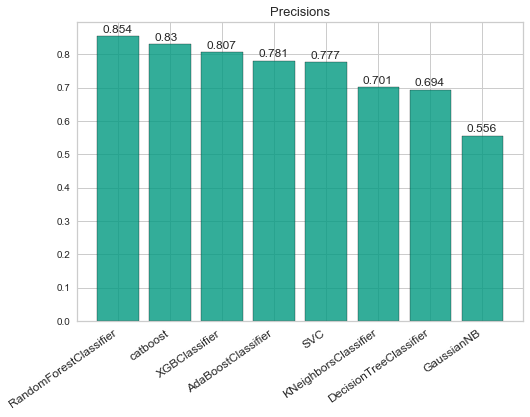

,precision,accuracy,recall,f1
RandomForestClassifier,0.854,0.867,0.730,0.786
catboost,0.830,0.865,0.754,0.790
XGBClassifier,0.807,0.860,0.766,0.785
AdaBoostClassifier,0.781,0.857,0.799,0.789
SVC,0.777,0.808,0.602,0.677
KNeighborsClassifier,0.701,0.808,0.748,0.722
DecisionTreeClassifier,0.694,0.798,0.714,0.703
GaussianNB,0.556,0.726,0.928,0.696


In [33]:
f_cross(df_RF_RFE)

### Catboost feature selection

In [38]:
#feature_importances gives "no useless columns" here, so test of feature selection with rfe
"""estimator=cat
X=df.drop('experimental_class',axis=1)
y=df.experimental_class
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, y)
selection_model=list(X.columns[selector.support_])
selection_model.append('experimental_class')
df_model=df[[c for c in df.columns if c in selection_model]]"""

"estimator=cat\nX=df.drop('experimental_class',axis=1)\ny=df.experimental_class\nselector = RFECV(estimator, step=1, cv=5)\nselector = selector.fit(X, y)\nselection_model=list(X.columns[selector.support_])\nselection_model.append('experimental_class')\ndf_model=df[[c for c in df.columns if c in selection_model]]"

In [35]:
#as it takes too long, I keep here the useful columns 
useful_col=df[['SpMax_L', 'J_Dz', 'nHM', 'F01', 'F04_N', 'NssssC', 'nCb', 'C%', 'nC',
       'nO', 'F03_N', 'SdssC', 'HyWi_B', 'LOC', 'SM6_L', 'F03', 'M', 'Mi',
       'SpPosA_B', 'nCIR', 'B01', 'B03', 'SpMax_A', 'Psi_i_1d', 'SdO', 'TI2_L',
       'nCrt', 'C026', 'F02_N', 'nHDon', 'SpMax_B', 'Psi_i_A', 'nN', 'SM6_B',
       'nArCOOR', 'nX', 'experimental_class']]
useless_col=[c for c in df.columns if c not in useful_col]

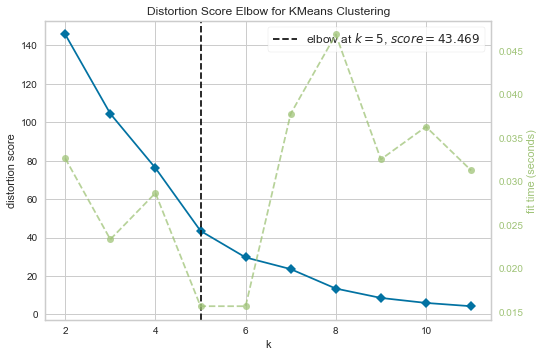

C:\Users\auror\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\auror\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\auror\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


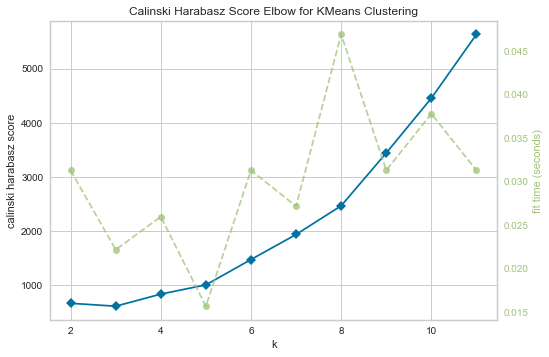

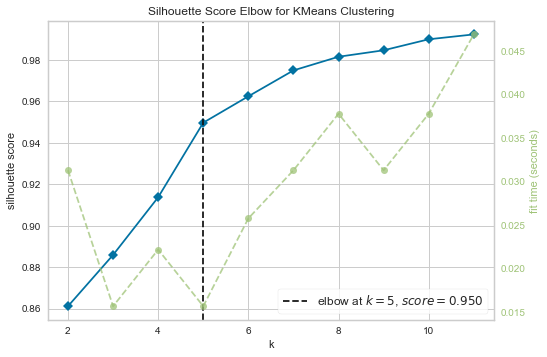

5


In [36]:
df_catb_RFE=f_cluster(df, useless_col)

KNeighborsClassifier(n_neighbors=3) : [0.771, 0.686, 0.69, 0.757, 0.662]
KNeighborsClassifier() : [0.729, 0.653, 0.682, 0.771, 0.667]
SVC() : [0.807, 0.756, 0.734, 0.857, 0.727]
GaussianNB() : [0.661, 0.59, 0.571, 0.602, 0.533]
DecisionTreeClassifier() : [0.728, 0.662, 0.667, 0.779, 0.672]
RandomForestClassifier() : [0.857, 0.849, 0.803, 0.877, 0.828]
RandomForestClassifier(class_weight='balanced') : [0.875, 0.846, 0.836, 0.871, 0.836]
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_paramete

142:	learn: 0.3333460	total: 343ms	remaining: 2.05s
143:	learn: 0.3325581	total: 345ms	remaining: 2.05s
144:	learn: 0.3317167	total: 348ms	remaining: 2.05s
145:	learn: 0.3310200	total: 351ms	remaining: 2.05s
146:	learn: 0.3301080	total: 354ms	remaining: 2.05s
147:	learn: 0.3292997	total: 357ms	remaining: 2.05s
148:	learn: 0.3286458	total: 359ms	remaining: 2.05s
149:	learn: 0.3279866	total: 361ms	remaining: 2.05s
150:	learn: 0.3273624	total: 364ms	remaining: 2.04s
151:	learn: 0.3265660	total: 366ms	remaining: 2.04s
152:	learn: 0.3260042	total: 368ms	remaining: 2.04s
153:	learn: 0.3254139	total: 370ms	remaining: 2.03s
154:	learn: 0.3245206	total: 372ms	remaining: 2.03s
155:	learn: 0.3237141	total: 374ms	remaining: 2.02s
156:	learn: 0.3228081	total: 377ms	remaining: 2.02s
157:	learn: 0.3220280	total: 379ms	remaining: 2.02s
158:	learn: 0.3211743	total: 381ms	remaining: 2.02s
159:	learn: 0.3207633	total: 383ms	remaining: 2.01s
160:	learn: 0.3199371	total: 385ms	remaining: 2.01s
161:	learn: 

375:	learn: 0.2316127	total: 861ms	remaining: 1.43s
376:	learn: 0.2314373	total: 863ms	remaining: 1.43s
377:	learn: 0.2312492	total: 865ms	remaining: 1.42s
378:	learn: 0.2309292	total: 867ms	remaining: 1.42s
379:	learn: 0.2306504	total: 869ms	remaining: 1.42s
380:	learn: 0.2302343	total: 872ms	remaining: 1.42s
381:	learn: 0.2299051	total: 874ms	remaining: 1.41s
382:	learn: 0.2296888	total: 876ms	remaining: 1.41s
383:	learn: 0.2295480	total: 879ms	remaining: 1.41s
384:	learn: 0.2292620	total: 882ms	remaining: 1.41s
385:	learn: 0.2289337	total: 884ms	remaining: 1.41s
386:	learn: 0.2286869	total: 886ms	remaining: 1.4s
387:	learn: 0.2284093	total: 888ms	remaining: 1.4s
388:	learn: 0.2282787	total: 890ms	remaining: 1.4s
389:	learn: 0.2276691	total: 893ms	remaining: 1.4s
390:	learn: 0.2272989	total: 895ms	remaining: 1.39s
391:	learn: 0.2270254	total: 897ms	remaining: 1.39s
392:	learn: 0.2268566	total: 900ms	remaining: 1.39s
393:	learn: 0.2265224	total: 902ms	remaining: 1.39s
394:	learn: 0.22

534:	learn: 0.1969500	total: 1.21s	remaining: 1.05s
535:	learn: 0.1968090	total: 1.22s	remaining: 1.05s
536:	learn: 0.1965898	total: 1.22s	remaining: 1.05s
537:	learn: 0.1963462	total: 1.22s	remaining: 1.05s
538:	learn: 0.1961235	total: 1.22s	remaining: 1.05s
539:	learn: 0.1959233	total: 1.23s	remaining: 1.04s
540:	learn: 0.1957563	total: 1.23s	remaining: 1.04s
541:	learn: 0.1954885	total: 1.23s	remaining: 1.04s
542:	learn: 0.1952736	total: 1.23s	remaining: 1.04s
543:	learn: 0.1950632	total: 1.24s	remaining: 1.03s
544:	learn: 0.1950209	total: 1.24s	remaining: 1.03s
545:	learn: 0.1947208	total: 1.24s	remaining: 1.03s
546:	learn: 0.1945258	total: 1.24s	remaining: 1.03s
547:	learn: 0.1942786	total: 1.25s	remaining: 1.03s
548:	learn: 0.1942284	total: 1.25s	remaining: 1.02s
549:	learn: 0.1940479	total: 1.25s	remaining: 1.02s
550:	learn: 0.1938146	total: 1.25s	remaining: 1.02s
551:	learn: 0.1935608	total: 1.25s	remaining: 1.02s
552:	learn: 0.1933847	total: 1.26s	remaining: 1.02s
553:	learn: 

748:	learn: 0.1589306	total: 1.73s	remaining: 579ms
749:	learn: 0.1587545	total: 1.73s	remaining: 577ms
750:	learn: 0.1586124	total: 1.73s	remaining: 575ms
751:	learn: 0.1585071	total: 1.74s	remaining: 572ms
752:	learn: 0.1583283	total: 1.74s	remaining: 570ms
753:	learn: 0.1581869	total: 1.74s	remaining: 567ms
754:	learn: 0.1580345	total: 1.74s	remaining: 565ms
755:	learn: 0.1577775	total: 1.74s	remaining: 563ms
756:	learn: 0.1576464	total: 1.75s	remaining: 561ms
757:	learn: 0.1574536	total: 1.75s	remaining: 558ms
758:	learn: 0.1572414	total: 1.75s	remaining: 556ms
759:	learn: 0.1570827	total: 1.75s	remaining: 554ms
760:	learn: 0.1568621	total: 1.76s	remaining: 552ms
761:	learn: 0.1566905	total: 1.76s	remaining: 549ms
762:	learn: 0.1565016	total: 1.76s	remaining: 547ms
763:	learn: 0.1562477	total: 1.76s	remaining: 545ms
764:	learn: 0.1560714	total: 1.76s	remaining: 542ms
765:	learn: 0.1559634	total: 1.77s	remaining: 540ms
766:	learn: 0.1557147	total: 1.77s	remaining: 538ms
767:	learn: 

909:	learn: 0.1331930	total: 2.09s	remaining: 207ms
910:	learn: 0.1331070	total: 2.09s	remaining: 204ms
911:	learn: 0.1329790	total: 2.09s	remaining: 202ms
912:	learn: 0.1327013	total: 2.1s	remaining: 200ms
913:	learn: 0.1325877	total: 2.1s	remaining: 197ms
914:	learn: 0.1324774	total: 2.1s	remaining: 195ms
915:	learn: 0.1322858	total: 2.1s	remaining: 193ms
916:	learn: 0.1320842	total: 2.1s	remaining: 190ms
917:	learn: 0.1319276	total: 2.11s	remaining: 188ms
918:	learn: 0.1317891	total: 2.11s	remaining: 186ms
919:	learn: 0.1316937	total: 2.11s	remaining: 184ms
920:	learn: 0.1315695	total: 2.11s	remaining: 181ms
921:	learn: 0.1313547	total: 2.12s	remaining: 179ms
922:	learn: 0.1311983	total: 2.12s	remaining: 177ms
923:	learn: 0.1310396	total: 2.12s	remaining: 174ms
924:	learn: 0.1308865	total: 2.12s	remaining: 172ms
925:	learn: 0.1306061	total: 2.13s	remaining: 170ms
926:	learn: 0.1305540	total: 2.13s	remaining: 168ms
927:	learn: 0.1304278	total: 2.13s	remaining: 165ms
928:	learn: 0.130

104:	learn: 0.3695036	total: 270ms	remaining: 2.3s
105:	learn: 0.3685289	total: 273ms	remaining: 2.3s
106:	learn: 0.3670621	total: 276ms	remaining: 2.3s
107:	learn: 0.3658105	total: 278ms	remaining: 2.3s
108:	learn: 0.3649259	total: 280ms	remaining: 2.29s
109:	learn: 0.3639554	total: 283ms	remaining: 2.29s
110:	learn: 0.3628323	total: 285ms	remaining: 2.28s
111:	learn: 0.3618989	total: 287ms	remaining: 2.28s
112:	learn: 0.3608031	total: 290ms	remaining: 2.28s
113:	learn: 0.3594447	total: 293ms	remaining: 2.27s
114:	learn: 0.3581680	total: 295ms	remaining: 2.27s
115:	learn: 0.3569034	total: 297ms	remaining: 2.26s
116:	learn: 0.3561453	total: 299ms	remaining: 2.26s
117:	learn: 0.3545854	total: 302ms	remaining: 2.25s
118:	learn: 0.3535992	total: 304ms	remaining: 2.25s
119:	learn: 0.3522282	total: 307ms	remaining: 2.25s
120:	learn: 0.3513854	total: 309ms	remaining: 2.24s
121:	learn: 0.3504744	total: 311ms	remaining: 2.24s
122:	learn: 0.3493818	total: 313ms	remaining: 2.23s
123:	learn: 0.34

309:	learn: 0.2440961	total: 785ms	remaining: 1.75s
310:	learn: 0.2438229	total: 788ms	remaining: 1.75s
311:	learn: 0.2436067	total: 790ms	remaining: 1.74s
312:	learn: 0.2433912	total: 792ms	remaining: 1.74s
313:	learn: 0.2430841	total: 794ms	remaining: 1.74s
314:	learn: 0.2426615	total: 797ms	remaining: 1.73s
315:	learn: 0.2422825	total: 799ms	remaining: 1.73s
316:	learn: 0.2419567	total: 801ms	remaining: 1.73s
317:	learn: 0.2417441	total: 804ms	remaining: 1.72s
318:	learn: 0.2413560	total: 806ms	remaining: 1.72s
319:	learn: 0.2411353	total: 809ms	remaining: 1.72s
320:	learn: 0.2408282	total: 811ms	remaining: 1.72s
321:	learn: 0.2406284	total: 813ms	remaining: 1.71s
322:	learn: 0.2402484	total: 816ms	remaining: 1.71s
323:	learn: 0.2399231	total: 819ms	remaining: 1.71s
324:	learn: 0.2396936	total: 821ms	remaining: 1.71s
325:	learn: 0.2394278	total: 823ms	remaining: 1.7s
326:	learn: 0.2389920	total: 825ms	remaining: 1.7s
327:	learn: 0.2386568	total: 828ms	remaining: 1.7s
328:	learn: 0.2

509:	learn: 0.1932507	total: 1.31s	remaining: 1.26s
510:	learn: 0.1932328	total: 1.31s	remaining: 1.25s
511:	learn: 0.1929940	total: 1.31s	remaining: 1.25s
512:	learn: 0.1927623	total: 1.32s	remaining: 1.25s
513:	learn: 0.1926384	total: 1.32s	remaining: 1.25s
514:	learn: 0.1924159	total: 1.32s	remaining: 1.25s
515:	learn: 0.1922145	total: 1.33s	remaining: 1.24s
516:	learn: 0.1919771	total: 1.33s	remaining: 1.24s
517:	learn: 0.1917410	total: 1.33s	remaining: 1.24s
518:	learn: 0.1916512	total: 1.33s	remaining: 1.24s
519:	learn: 0.1915263	total: 1.34s	remaining: 1.23s
520:	learn: 0.1913288	total: 1.34s	remaining: 1.23s
521:	learn: 0.1911696	total: 1.34s	remaining: 1.23s
522:	learn: 0.1910034	total: 1.34s	remaining: 1.23s
523:	learn: 0.1907311	total: 1.35s	remaining: 1.22s
524:	learn: 0.1905635	total: 1.35s	remaining: 1.22s
525:	learn: 0.1902456	total: 1.35s	remaining: 1.22s
526:	learn: 0.1901233	total: 1.36s	remaining: 1.22s
527:	learn: 0.1899182	total: 1.36s	remaining: 1.21s
528:	learn: 

716:	learn: 0.1560005	total: 1.83s	remaining: 724ms
717:	learn: 0.1557923	total: 1.84s	remaining: 722ms
718:	learn: 0.1555667	total: 1.84s	remaining: 719ms
719:	learn: 0.1554069	total: 1.84s	remaining: 717ms
720:	learn: 0.1552993	total: 1.85s	remaining: 714ms
721:	learn: 0.1551241	total: 1.85s	remaining: 712ms
722:	learn: 0.1549171	total: 1.85s	remaining: 709ms
723:	learn: 0.1548172	total: 1.85s	remaining: 707ms
724:	learn: 0.1548019	total: 1.86s	remaining: 704ms
725:	learn: 0.1546597	total: 1.86s	remaining: 701ms
726:	learn: 0.1545247	total: 1.86s	remaining: 699ms
727:	learn: 0.1543802	total: 1.86s	remaining: 696ms
728:	learn: 0.1542188	total: 1.86s	remaining: 694ms
729:	learn: 0.1540503	total: 1.87s	remaining: 691ms
730:	learn: 0.1539519	total: 1.87s	remaining: 689ms
731:	learn: 0.1538144	total: 1.87s	remaining: 686ms
732:	learn: 0.1535984	total: 1.88s	remaining: 683ms
733:	learn: 0.1534738	total: 1.88s	remaining: 681ms
734:	learn: 0.1534167	total: 1.88s	remaining: 678ms
735:	learn: 

922:	learn: 0.1256545	total: 2.35s	remaining: 196ms
923:	learn: 0.1255225	total: 2.35s	remaining: 193ms
924:	learn: 0.1254029	total: 2.35s	remaining: 191ms
925:	learn: 0.1252291	total: 2.35s	remaining: 188ms
926:	learn: 0.1251041	total: 2.36s	remaining: 186ms
927:	learn: 0.1250665	total: 2.36s	remaining: 183ms
928:	learn: 0.1249160	total: 2.36s	remaining: 181ms
929:	learn: 0.1247300	total: 2.37s	remaining: 178ms
930:	learn: 0.1246604	total: 2.37s	remaining: 176ms
931:	learn: 0.1245685	total: 2.37s	remaining: 173ms
932:	learn: 0.1243493	total: 2.37s	remaining: 170ms
933:	learn: 0.1241699	total: 2.38s	remaining: 168ms
934:	learn: 0.1241013	total: 2.38s	remaining: 165ms
935:	learn: 0.1238731	total: 2.38s	remaining: 163ms
936:	learn: 0.1237525	total: 2.38s	remaining: 160ms
937:	learn: 0.1236195	total: 2.38s	remaining: 158ms
938:	learn: 0.1234539	total: 2.39s	remaining: 155ms
939:	learn: 0.1232831	total: 2.39s	remaining: 153ms
940:	learn: 0.1231136	total: 2.39s	remaining: 150ms
941:	learn: 

110:	learn: 0.3542893	total: 296ms	remaining: 2.37s
111:	learn: 0.3532227	total: 298ms	remaining: 2.36s
112:	learn: 0.3521256	total: 301ms	remaining: 2.36s
113:	learn: 0.3509888	total: 303ms	remaining: 2.35s
114:	learn: 0.3498941	total: 305ms	remaining: 2.35s
115:	learn: 0.3486795	total: 308ms	remaining: 2.35s
116:	learn: 0.3475710	total: 311ms	remaining: 2.34s
117:	learn: 0.3464700	total: 313ms	remaining: 2.34s
118:	learn: 0.3454629	total: 316ms	remaining: 2.34s
119:	learn: 0.3439996	total: 318ms	remaining: 2.33s
120:	learn: 0.3427609	total: 320ms	remaining: 2.33s
121:	learn: 0.3417636	total: 323ms	remaining: 2.32s
122:	learn: 0.3408068	total: 326ms	remaining: 2.32s
123:	learn: 0.3397580	total: 329ms	remaining: 2.32s
124:	learn: 0.3387449	total: 331ms	remaining: 2.32s
125:	learn: 0.3376438	total: 333ms	remaining: 2.31s
126:	learn: 0.3369484	total: 335ms	remaining: 2.31s
127:	learn: 0.3358751	total: 339ms	remaining: 2.31s
128:	learn: 0.3348712	total: 341ms	remaining: 2.3s
129:	learn: 0

317:	learn: 0.2351908	total: 821ms	remaining: 1.76s
318:	learn: 0.2349442	total: 823ms	remaining: 1.76s
319:	learn: 0.2346928	total: 826ms	remaining: 1.75s
320:	learn: 0.2343287	total: 828ms	remaining: 1.75s
321:	learn: 0.2338591	total: 830ms	remaining: 1.75s
322:	learn: 0.2336215	total: 833ms	remaining: 1.75s
323:	learn: 0.2332600	total: 836ms	remaining: 1.75s
324:	learn: 0.2330390	total: 839ms	remaining: 1.74s
325:	learn: 0.2328705	total: 841ms	remaining: 1.74s
326:	learn: 0.2326697	total: 843ms	remaining: 1.74s
327:	learn: 0.2323738	total: 845ms	remaining: 1.73s
328:	learn: 0.2320292	total: 848ms	remaining: 1.73s
329:	learn: 0.2316451	total: 851ms	remaining: 1.73s
330:	learn: 0.2313176	total: 853ms	remaining: 1.72s
331:	learn: 0.2310840	total: 856ms	remaining: 1.72s
332:	learn: 0.2309141	total: 858ms	remaining: 1.72s
333:	learn: 0.2306839	total: 860ms	remaining: 1.71s
334:	learn: 0.2303581	total: 862ms	remaining: 1.71s
335:	learn: 0.2300355	total: 865ms	remaining: 1.71s
336:	learn: 

515:	learn: 0.1859875	total: 1.33s	remaining: 1.25s
516:	learn: 0.1858332	total: 1.34s	remaining: 1.25s
517:	learn: 0.1856359	total: 1.34s	remaining: 1.25s
518:	learn: 0.1854561	total: 1.34s	remaining: 1.24s
519:	learn: 0.1851435	total: 1.34s	remaining: 1.24s
520:	learn: 0.1850126	total: 1.35s	remaining: 1.24s
521:	learn: 0.1847841	total: 1.35s	remaining: 1.24s
522:	learn: 0.1845659	total: 1.35s	remaining: 1.23s
523:	learn: 0.1844655	total: 1.35s	remaining: 1.23s
524:	learn: 0.1843467	total: 1.36s	remaining: 1.23s
525:	learn: 0.1841396	total: 1.36s	remaining: 1.23s
526:	learn: 0.1838634	total: 1.36s	remaining: 1.22s
527:	learn: 0.1835557	total: 1.36s	remaining: 1.22s
528:	learn: 0.1833074	total: 1.37s	remaining: 1.22s
529:	learn: 0.1830672	total: 1.37s	remaining: 1.21s
530:	learn: 0.1828758	total: 1.37s	remaining: 1.21s
531:	learn: 0.1827923	total: 1.37s	remaining: 1.21s
532:	learn: 0.1826206	total: 1.38s	remaining: 1.21s
533:	learn: 0.1824081	total: 1.38s	remaining: 1.2s
534:	learn: 0

738:	learn: 0.1457134	total: 1.86s	remaining: 657ms
739:	learn: 0.1454777	total: 1.86s	remaining: 654ms
740:	learn: 0.1453331	total: 1.86s	remaining: 651ms
741:	learn: 0.1451389	total: 1.87s	remaining: 649ms
742:	learn: 0.1450963	total: 1.87s	remaining: 646ms
743:	learn: 0.1448952	total: 1.87s	remaining: 644ms
744:	learn: 0.1446996	total: 1.87s	remaining: 641ms
745:	learn: 0.1444514	total: 1.88s	remaining: 639ms
746:	learn: 0.1443464	total: 1.88s	remaining: 636ms
747:	learn: 0.1441173	total: 1.88s	remaining: 633ms
748:	learn: 0.1439909	total: 1.88s	remaining: 631ms
749:	learn: 0.1437994	total: 1.88s	remaining: 628ms
750:	learn: 0.1437656	total: 1.89s	remaining: 626ms
751:	learn: 0.1435370	total: 1.89s	remaining: 623ms
752:	learn: 0.1433977	total: 1.89s	remaining: 620ms
753:	learn: 0.1433743	total: 1.89s	remaining: 618ms
754:	learn: 0.1432050	total: 1.9s	remaining: 615ms
755:	learn: 0.1430388	total: 1.9s	remaining: 613ms
756:	learn: 0.1429870	total: 1.9s	remaining: 610ms
757:	learn: 0.1

957:	learn: 0.1139130	total: 2.38s	remaining: 104ms
958:	learn: 0.1138092	total: 2.38s	remaining: 102ms
959:	learn: 0.1136769	total: 2.38s	remaining: 99.4ms
960:	learn: 0.1136034	total: 2.39s	remaining: 96.9ms
961:	learn: 0.1134232	total: 2.39s	remaining: 94.4ms
962:	learn: 0.1133513	total: 2.39s	remaining: 92ms
963:	learn: 0.1132616	total: 2.4s	remaining: 89.5ms
964:	learn: 0.1131757	total: 2.4s	remaining: 87ms
965:	learn: 0.1130481	total: 2.4s	remaining: 84.5ms
966:	learn: 0.1129789	total: 2.4s	remaining: 82ms
967:	learn: 0.1127551	total: 2.41s	remaining: 79.6ms
968:	learn: 0.1127214	total: 2.41s	remaining: 77.1ms
969:	learn: 0.1125663	total: 2.41s	remaining: 74.6ms
970:	learn: 0.1124948	total: 2.42s	remaining: 72.1ms
971:	learn: 0.1124251	total: 2.42s	remaining: 69.6ms
972:	learn: 0.1122581	total: 2.42s	remaining: 67.2ms
973:	learn: 0.1120994	total: 2.42s	remaining: 64.7ms
974:	learn: 0.1119724	total: 2.42s	remaining: 62.2ms
975:	learn: 0.1118372	total: 2.43s	remaining: 59.7ms
976:	

118:	learn: 0.3585835	total: 349ms	remaining: 2.58s
119:	learn: 0.3572652	total: 351ms	remaining: 2.58s
120:	learn: 0.3563100	total: 353ms	remaining: 2.57s
121:	learn: 0.3553345	total: 356ms	remaining: 2.56s
122:	learn: 0.3543910	total: 358ms	remaining: 2.56s
123:	learn: 0.3534959	total: 361ms	remaining: 2.55s
124:	learn: 0.3525979	total: 364ms	remaining: 2.55s
125:	learn: 0.3518350	total: 366ms	remaining: 2.54s
126:	learn: 0.3506465	total: 369ms	remaining: 2.54s
127:	learn: 0.3492328	total: 372ms	remaining: 2.53s
128:	learn: 0.3478212	total: 374ms	remaining: 2.53s
129:	learn: 0.3470582	total: 376ms	remaining: 2.52s
130:	learn: 0.3465482	total: 379ms	remaining: 2.51s
131:	learn: 0.3449546	total: 382ms	remaining: 2.51s
132:	learn: 0.3440597	total: 384ms	remaining: 2.51s
133:	learn: 0.3433014	total: 387ms	remaining: 2.5s
134:	learn: 0.3423324	total: 390ms	remaining: 2.5s
135:	learn: 0.3416414	total: 392ms	remaining: 2.49s
136:	learn: 0.3404840	total: 395ms	remaining: 2.49s
137:	learn: 0.

303:	learn: 0.2502721	total: 853ms	remaining: 1.95s
304:	learn: 0.2498624	total: 856ms	remaining: 1.95s
305:	learn: 0.2496313	total: 858ms	remaining: 1.95s
306:	learn: 0.2493965	total: 860ms	remaining: 1.94s
307:	learn: 0.2491451	total: 864ms	remaining: 1.94s
308:	learn: 0.2489264	total: 867ms	remaining: 1.94s
309:	learn: 0.2487479	total: 869ms	remaining: 1.93s
310:	learn: 0.2484089	total: 872ms	remaining: 1.93s
311:	learn: 0.2480683	total: 874ms	remaining: 1.93s
312:	learn: 0.2476120	total: 877ms	remaining: 1.92s
313:	learn: 0.2472286	total: 880ms	remaining: 1.92s
314:	learn: 0.2467842	total: 883ms	remaining: 1.92s
315:	learn: 0.2464514	total: 886ms	remaining: 1.92s
316:	learn: 0.2460309	total: 888ms	remaining: 1.91s
317:	learn: 0.2457264	total: 890ms	remaining: 1.91s
318:	learn: 0.2453678	total: 894ms	remaining: 1.91s
319:	learn: 0.2452320	total: 897ms	remaining: 1.91s
320:	learn: 0.2449919	total: 900ms	remaining: 1.9s
321:	learn: 0.2446918	total: 902ms	remaining: 1.9s
322:	learn: 0.

495:	learn: 0.2005419	total: 1.36s	remaining: 1.39s
496:	learn: 0.2003469	total: 1.37s	remaining: 1.38s
497:	learn: 0.2001342	total: 1.37s	remaining: 1.38s
498:	learn: 0.1999897	total: 1.37s	remaining: 1.38s
499:	learn: 0.1999035	total: 1.37s	remaining: 1.37s
500:	learn: 0.1997331	total: 1.38s	remaining: 1.37s
501:	learn: 0.1994937	total: 1.38s	remaining: 1.37s
502:	learn: 0.1992146	total: 1.38s	remaining: 1.36s
503:	learn: 0.1988226	total: 1.38s	remaining: 1.36s
504:	learn: 0.1985110	total: 1.39s	remaining: 1.36s
505:	learn: 0.1982811	total: 1.39s	remaining: 1.35s
506:	learn: 0.1980795	total: 1.39s	remaining: 1.35s
507:	learn: 0.1979223	total: 1.39s	remaining: 1.35s
508:	learn: 0.1976340	total: 1.39s	remaining: 1.34s
509:	learn: 0.1975255	total: 1.4s	remaining: 1.34s
510:	learn: 0.1974193	total: 1.4s	remaining: 1.34s
511:	learn: 0.1972161	total: 1.4s	remaining: 1.34s
512:	learn: 0.1970619	total: 1.4s	remaining: 1.33s
513:	learn: 0.1969301	total: 1.41s	remaining: 1.33s
514:	learn: 0.19

708:	learn: 0.1612287	total: 1.86s	remaining: 762ms
709:	learn: 0.1610607	total: 1.86s	remaining: 760ms
710:	learn: 0.1608017	total: 1.86s	remaining: 757ms
711:	learn: 0.1606620	total: 1.86s	remaining: 754ms
712:	learn: 0.1605364	total: 1.87s	remaining: 752ms
713:	learn: 0.1604216	total: 1.87s	remaining: 749ms
714:	learn: 0.1602284	total: 1.87s	remaining: 746ms
715:	learn: 0.1598260	total: 1.87s	remaining: 743ms
716:	learn: 0.1595306	total: 1.88s	remaining: 741ms
717:	learn: 0.1592814	total: 1.88s	remaining: 738ms
718:	learn: 0.1590507	total: 1.88s	remaining: 735ms
719:	learn: 0.1589967	total: 1.88s	remaining: 733ms
720:	learn: 0.1588306	total: 1.89s	remaining: 730ms
721:	learn: 0.1587217	total: 1.89s	remaining: 727ms
722:	learn: 0.1585876	total: 1.89s	remaining: 724ms
723:	learn: 0.1583250	total: 1.89s	remaining: 722ms
724:	learn: 0.1580849	total: 1.9s	remaining: 719ms
725:	learn: 0.1579018	total: 1.9s	remaining: 716ms
726:	learn: 0.1576236	total: 1.9s	remaining: 714ms
727:	learn: 0.1

932:	learn: 0.1240300	total: 2.36s	remaining: 170ms
933:	learn: 0.1237953	total: 2.37s	remaining: 167ms
934:	learn: 0.1236934	total: 2.37s	remaining: 165ms
935:	learn: 0.1234312	total: 2.37s	remaining: 162ms
936:	learn: 0.1232826	total: 2.37s	remaining: 160ms
937:	learn: 0.1231682	total: 2.37s	remaining: 157ms
938:	learn: 0.1229681	total: 2.38s	remaining: 154ms
939:	learn: 0.1227413	total: 2.38s	remaining: 152ms
940:	learn: 0.1225727	total: 2.38s	remaining: 149ms
941:	learn: 0.1223107	total: 2.38s	remaining: 147ms
942:	learn: 0.1220693	total: 2.38s	remaining: 144ms
943:	learn: 0.1218284	total: 2.39s	remaining: 142ms
944:	learn: 0.1217031	total: 2.39s	remaining: 139ms
945:	learn: 0.1216790	total: 2.39s	remaining: 137ms
946:	learn: 0.1215770	total: 2.39s	remaining: 134ms
947:	learn: 0.1214345	total: 2.4s	remaining: 131ms
948:	learn: 0.1213407	total: 2.4s	remaining: 129ms
949:	learn: 0.1212286	total: 2.4s	remaining: 126ms
950:	learn: 0.1210057	total: 2.4s	remaining: 124ms
951:	learn: 0.12

137:	learn: 0.3249687	total: 340ms	remaining: 2.13s
138:	learn: 0.3239096	total: 343ms	remaining: 2.12s
139:	learn: 0.3227867	total: 345ms	remaining: 2.12s
140:	learn: 0.3221930	total: 349ms	remaining: 2.12s
141:	learn: 0.3213198	total: 351ms	remaining: 2.12s
142:	learn: 0.3202583	total: 353ms	remaining: 2.12s
143:	learn: 0.3196983	total: 356ms	remaining: 2.11s
144:	learn: 0.3191213	total: 358ms	remaining: 2.11s
145:	learn: 0.3182400	total: 361ms	remaining: 2.11s
146:	learn: 0.3174838	total: 364ms	remaining: 2.11s
147:	learn: 0.3166287	total: 367ms	remaining: 2.11s
148:	learn: 0.3158641	total: 369ms	remaining: 2.1s
149:	learn: 0.3149530	total: 371ms	remaining: 2.1s
150:	learn: 0.3141333	total: 373ms	remaining: 2.1s
151:	learn: 0.3130518	total: 376ms	remaining: 2.1s
152:	learn: 0.3124886	total: 379ms	remaining: 2.1s
153:	learn: 0.3117470	total: 381ms	remaining: 2.1s
154:	learn: 0.3110501	total: 383ms	remaining: 2.09s
155:	learn: 0.3102981	total: 386ms	remaining: 2.08s
156:	learn: 0.3093

319:	learn: 0.2315915	total: 832ms	remaining: 1.77s
320:	learn: 0.2313603	total: 836ms	remaining: 1.77s
321:	learn: 0.2310408	total: 839ms	remaining: 1.77s
322:	learn: 0.2307123	total: 842ms	remaining: 1.76s
323:	learn: 0.2304086	total: 844ms	remaining: 1.76s
324:	learn: 0.2301008	total: 847ms	remaining: 1.76s
325:	learn: 0.2297636	total: 849ms	remaining: 1.75s
326:	learn: 0.2294029	total: 852ms	remaining: 1.75s
327:	learn: 0.2288884	total: 855ms	remaining: 1.75s
328:	learn: 0.2286362	total: 857ms	remaining: 1.75s
329:	learn: 0.2282930	total: 860ms	remaining: 1.75s
330:	learn: 0.2279008	total: 862ms	remaining: 1.74s
331:	learn: 0.2277231	total: 864ms	remaining: 1.74s
332:	learn: 0.2275276	total: 867ms	remaining: 1.74s
333:	learn: 0.2272302	total: 869ms	remaining: 1.73s
334:	learn: 0.2268009	total: 872ms	remaining: 1.73s
335:	learn: 0.2265157	total: 874ms	remaining: 1.73s
336:	learn: 0.2261295	total: 876ms	remaining: 1.72s
337:	learn: 0.2258208	total: 879ms	remaining: 1.72s
338:	learn: 

543:	learn: 0.1773902	total: 1.33s	remaining: 1.12s
544:	learn: 0.1770510	total: 1.34s	remaining: 1.12s
545:	learn: 0.1768403	total: 1.34s	remaining: 1.11s
546:	learn: 0.1766617	total: 1.34s	remaining: 1.11s
547:	learn: 0.1763867	total: 1.34s	remaining: 1.11s
548:	learn: 0.1762441	total: 1.35s	remaining: 1.11s
549:	learn: 0.1760640	total: 1.35s	remaining: 1.1s
550:	learn: 0.1758164	total: 1.35s	remaining: 1.1s
551:	learn: 0.1756163	total: 1.35s	remaining: 1.1s
552:	learn: 0.1754847	total: 1.36s	remaining: 1.1s
553:	learn: 0.1752751	total: 1.36s	remaining: 1.09s
554:	learn: 0.1750628	total: 1.36s	remaining: 1.09s
555:	learn: 0.1748440	total: 1.36s	remaining: 1.09s
556:	learn: 0.1745611	total: 1.36s	remaining: 1.09s
557:	learn: 0.1743283	total: 1.37s	remaining: 1.08s
558:	learn: 0.1741916	total: 1.37s	remaining: 1.08s
559:	learn: 0.1740108	total: 1.37s	remaining: 1.08s
560:	learn: 0.1739220	total: 1.37s	remaining: 1.07s
561:	learn: 0.1737544	total: 1.38s	remaining: 1.07s
562:	learn: 0.17

765:	learn: 0.1380337	total: 1.84s	remaining: 564ms
766:	learn: 0.1378120	total: 1.85s	remaining: 561ms
767:	learn: 0.1377095	total: 1.85s	remaining: 559ms
768:	learn: 0.1376077	total: 1.85s	remaining: 557ms
769:	learn: 0.1372725	total: 1.86s	remaining: 555ms
770:	learn: 0.1370461	total: 1.86s	remaining: 552ms
771:	learn: 0.1369096	total: 1.86s	remaining: 549ms
772:	learn: 0.1368564	total: 1.86s	remaining: 547ms
773:	learn: 0.1367042	total: 1.86s	remaining: 545ms
774:	learn: 0.1366025	total: 1.87s	remaining: 542ms
775:	learn: 0.1364592	total: 1.87s	remaining: 540ms
776:	learn: 0.1363154	total: 1.87s	remaining: 537ms
777:	learn: 0.1361972	total: 1.87s	remaining: 535ms
778:	learn: 0.1361119	total: 1.88s	remaining: 533ms
779:	learn: 0.1359179	total: 1.88s	remaining: 530ms
780:	learn: 0.1357322	total: 1.88s	remaining: 528ms
781:	learn: 0.1355638	total: 1.88s	remaining: 525ms
782:	learn: 0.1354447	total: 1.89s	remaining: 523ms
783:	learn: 0.1352612	total: 1.89s	remaining: 520ms
784:	learn: 

996:	learn: 0.1056483	total: 2.35s	remaining: 7.07ms
997:	learn: 0.1055200	total: 2.35s	remaining: 4.71ms
998:	learn: 0.1054313	total: 2.35s	remaining: 2.36ms
999:	learn: 0.1052940	total: 2.36s	remaining: 0us
<catboost.core.CatBoostClassifier object at 0x000001CA4C647EC8> : [0.851, 0.806, 0.812, 0.866, 0.804]


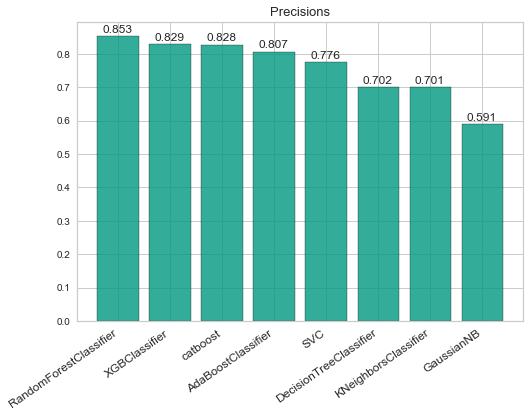

,precision,accuracy,recall,f1
RandomForestClassifier,0.853,0.869,0.736,0.789
XGBClassifier,0.829,0.867,0.762,0.794
catboost,0.828,0.867,0.762,0.793
AdaBoostClassifier,0.807,0.862,0.773,0.788
SVC,0.776,0.808,0.602,0.677
DecisionTreeClassifier,0.702,0.804,0.729,0.713
KNeighborsClassifier,0.701,0.808,0.748,0.722
GaussianNB,0.591,0.757,0.908,0.716


In [37]:
#cross validation of the feature selection with f_cross
f_cross(df_catb_RFE)

### Hyperparameter Tuning for the best model : Random Forest

In [41]:
params = {'n_estimators': [100, 200, 400, 800],
               'max_features': ['auto', 'sqrt'],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1,2, 4],
              'class_weight':[None,'balanced'],
               'bootstrap': [True,False]}

X=df_RF_RFE.drop('experimental_class',axis=1)
y=df_RF_RFE.experimental_class
model=rfc
#cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search=GridSearchCV(estimator=model, param_grid=params, n_jobs=-1)
grid_results=grid_search.fit(X,y)
grid_results.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       max_features='sqrt', min_samples_split=5,
                       n_estimators=400)

# Model validation

It seems that the better model is Random Forest using RFE for feature selection

Learning rate set to 0.009583
0:	learn: 0.6865752	total: 2.85ms	remaining: 2.85s
1:	learn: 0.6809866	total: 5.38ms	remaining: 2.68s
2:	learn: 0.6738214	total: 7.75ms	remaining: 2.57s
3:	learn: 0.6681531	total: 10.4ms	remaining: 2.59s
4:	learn: 0.6615784	total: 12.9ms	remaining: 2.57s
5:	learn: 0.6547797	total: 15.3ms	remaining: 2.54s
6:	learn: 0.6472713	total: 17.7ms	remaining: 2.52s
7:	learn: 0.6398103	total: 20.1ms	remaining: 2.49s
8:	learn: 0.6338844	total: 22.5ms	remaining: 2.48s
9:	learn: 0.6276636	total: 24.9ms	remaining: 2.46s
10:	learn: 0.6218820	total: 27.4ms	remaining: 2.47s
11:	learn: 0.6162822	total: 29.8ms	remaining: 2.45s
12:	learn: 0.6108812	total: 32.1ms	remaining: 2.44s
13:	learn: 0.6048551	total: 34.5ms	remaining: 2.43s
14:	learn: 0.6007383	total: 36.7ms	remaining: 2.41s
15:	learn: 0.5948573	total: 39.1ms	remaining: 2.4s
16:	learn: 0.5904757	total: 41.4ms	remaining: 2.39s
17:	learn: 0.5856743	total: 43.7ms	remaining: 2.38s
18:	learn: 0.5803687	total: 46.1ms	remaining:

218:	learn: 0.2786077	total: 528ms	remaining: 1.88s
219:	learn: 0.2782722	total: 531ms	remaining: 1.88s
220:	learn: 0.2776707	total: 533ms	remaining: 1.88s
221:	learn: 0.2769708	total: 536ms	remaining: 1.88s
222:	learn: 0.2765492	total: 539ms	remaining: 1.88s
223:	learn: 0.2761381	total: 541ms	remaining: 1.87s
224:	learn: 0.2755407	total: 543ms	remaining: 1.87s
225:	learn: 0.2752659	total: 546ms	remaining: 1.87s
226:	learn: 0.2748858	total: 549ms	remaining: 1.87s
227:	learn: 0.2744652	total: 551ms	remaining: 1.87s
228:	learn: 0.2740362	total: 554ms	remaining: 1.86s
229:	learn: 0.2736014	total: 557ms	remaining: 1.86s
230:	learn: 0.2731643	total: 559ms	remaining: 1.86s
231:	learn: 0.2728169	total: 562ms	remaining: 1.86s
232:	learn: 0.2724681	total: 565ms	remaining: 1.86s
233:	learn: 0.2719684	total: 567ms	remaining: 1.86s
234:	learn: 0.2716762	total: 569ms	remaining: 1.85s
235:	learn: 0.2714279	total: 571ms	remaining: 1.85s
236:	learn: 0.2709143	total: 574ms	remaining: 1.85s
237:	learn: 

444:	learn: 0.2074305	total: 1.06s	remaining: 1.33s
445:	learn: 0.2072499	total: 1.06s	remaining: 1.32s
446:	learn: 0.2070150	total: 1.07s	remaining: 1.32s
447:	learn: 0.2067971	total: 1.07s	remaining: 1.32s
448:	learn: 0.2065834	total: 1.07s	remaining: 1.32s
449:	learn: 0.2064287	total: 1.07s	remaining: 1.31s
450:	learn: 0.2061106	total: 1.08s	remaining: 1.31s
451:	learn: 0.2057606	total: 1.08s	remaining: 1.31s
452:	learn: 0.2054991	total: 1.08s	remaining: 1.31s
453:	learn: 0.2053216	total: 1.08s	remaining: 1.3s
454:	learn: 0.2052008	total: 1.09s	remaining: 1.3s
455:	learn: 0.2050011	total: 1.09s	remaining: 1.3s
456:	learn: 0.2049179	total: 1.09s	remaining: 1.3s
457:	learn: 0.2047474	total: 1.09s	remaining: 1.3s
458:	learn: 0.2045396	total: 1.1s	remaining: 1.29s
459:	learn: 0.2043298	total: 1.1s	remaining: 1.29s
460:	learn: 0.2042228	total: 1.1s	remaining: 1.29s
461:	learn: 0.2040435	total: 1.1s	remaining: 1.29s
462:	learn: 0.2039220	total: 1.11s	remaining: 1.28s
463:	learn: 0.2037445

660:	learn: 0.1659582	total: 1.59s	remaining: 816ms
661:	learn: 0.1658216	total: 1.59s	remaining: 814ms
662:	learn: 0.1655904	total: 1.6s	remaining: 812ms
663:	learn: 0.1653871	total: 1.6s	remaining: 809ms
664:	learn: 0.1652186	total: 1.6s	remaining: 807ms
665:	learn: 0.1648989	total: 1.6s	remaining: 805ms
666:	learn: 0.1646808	total: 1.61s	remaining: 802ms
667:	learn: 0.1644536	total: 1.61s	remaining: 800ms
668:	learn: 0.1643388	total: 1.61s	remaining: 798ms
669:	learn: 0.1642067	total: 1.61s	remaining: 795ms
670:	learn: 0.1639958	total: 1.62s	remaining: 792ms
671:	learn: 0.1639293	total: 1.62s	remaining: 790ms
672:	learn: 0.1638874	total: 1.62s	remaining: 787ms
673:	learn: 0.1635898	total: 1.62s	remaining: 785ms
674:	learn: 0.1635477	total: 1.63s	remaining: 783ms
675:	learn: 0.1633304	total: 1.63s	remaining: 781ms
676:	learn: 0.1631090	total: 1.63s	remaining: 778ms
677:	learn: 0.1629555	total: 1.63s	remaining: 776ms
678:	learn: 0.1628881	total: 1.64s	remaining: 773ms
679:	learn: 0.16

873:	learn: 0.1316451	total: 2.11s	remaining: 304ms
874:	learn: 0.1315907	total: 2.11s	remaining: 301ms
875:	learn: 0.1315718	total: 2.11s	remaining: 299ms
876:	learn: 0.1314270	total: 2.11s	remaining: 296ms
877:	learn: 0.1313211	total: 2.12s	remaining: 294ms
878:	learn: 0.1313120	total: 2.12s	remaining: 291ms
879:	learn: 0.1312508	total: 2.12s	remaining: 289ms
880:	learn: 0.1311468	total: 2.12s	remaining: 287ms
881:	learn: 0.1310921	total: 2.13s	remaining: 284ms
882:	learn: 0.1310147	total: 2.13s	remaining: 282ms
883:	learn: 0.1307592	total: 2.13s	remaining: 280ms
884:	learn: 0.1306640	total: 2.13s	remaining: 277ms
885:	learn: 0.1306008	total: 2.13s	remaining: 275ms
886:	learn: 0.1304947	total: 2.14s	remaining: 272ms
887:	learn: 0.1304400	total: 2.14s	remaining: 270ms
888:	learn: 0.1303201	total: 2.14s	remaining: 268ms
889:	learn: 0.1301947	total: 2.15s	remaining: 265ms
890:	learn: 0.1300581	total: 2.15s	remaining: 263ms
891:	learn: 0.1299627	total: 2.15s	remaining: 260ms
892:	learn: 

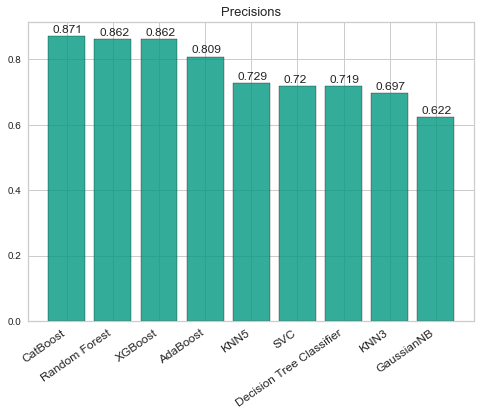

,Accuracy,Recall,Precision,F1
CatBoost,0.881517,0.760563,0.870968,0.812030
Random Forest,0.862559,0.704225,0.862069,0.775194
XGBoost,0.886256,0.788732,0.861538,0.823529
AdaBoost,0.862559,0.774648,0.808824,0.791367
KNN5,0.815166,0.718310,0.728571,0.723404
SVC,0.767773,0.507042,0.720000,0.595041
Decision Tree Classifier,0.796209,0.647887,0.718750,0.681481
KNN3,0.805687,0.746479,0.697368,0.721088
GaussianNB,0.777251,0.859155,0.622449,0.721893


In [96]:
(bootstrap=False, class_weight='balanced',
                       max_features='sqrt', min_samples_split=5,
                       n_estimators=400)

In [50]:
X=df_RF_RFE.drop('experimental_class',axis=1)
y=df_RF_RFE.experimental_class

res_cross={}
kfold=KFold(n_splits=5, shuffle=True, random_state=42)

model= RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       max_features='sqrt', min_samples_split=5,
                       n_estimators=400)

list_of_accuracies=[]
list_of_precision=[]
list_of_recall=[]
list_of_f1=[]
for train, test in kfold.split(X):
    model.fit(X.iloc[train], y.iloc[train])
    list_of_accuracies.append(accuracy_score(y.iloc[test], model.predict(X.iloc[test])))
    list_of_precision.append(precision_score(y.iloc[test], model.predict(X.iloc[test])))
    list_of_recall.append(recall_score(y.iloc[test], model.predict(X.iloc[test])))
    list_of_f1.append(f1_score(y.iloc[test], model.predict(X.iloc[test])))
res_cross[str(model).split("(")[0].split('.')[0].replace('<','')]=[round(np.mean(list_of_precision),3),
                                                                   round(np.mean(list_of_accuracies),3), 
                                    round(np.mean(list_of_recall),3), round(np.mean(list_of_f1),3)]
list_of_precision2=[round(i,3) for i in list_of_precision]

#The datafrane res_cross contains all the metrics values
res_cross=pd.DataFrame(res_cross).T
res_cross.columns=['precision', 'accuracy', 'recall', 'f1' ]
res_cross.sort_values(by='precision', ascending=False, inplace=True)

res_cross

,precision,accuracy,recall,f1
RandomForestClassifier,0.838,0.872,0.771,0.802


# To conclude

In order to predict if a chemical is biodegradable, the model with best performances is Random Forest, with feature selection using RFE.
The hyperparameter tuning decreases precision, but improve the other metrics.
